In [1]:
import sys
sys.path.insert(0, '../..')
import copy
import numpy as np
from model.base import CovidModel, SimulationParameters, set_parameters, normal_ci
from utils import BasicStatistics, RemovePolicy, Propaganda, setup_city_layout, AddPolicyInfectedRate, confidence_interval, multiple_runs
from model.utils import SocialPolicy

In [2]:
listeners = []
notusing =[
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_RETAIL,0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_FACTORY, 0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_OFFICE, 0.00025 ,11],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_HIGH_SCHOOL,0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_RETAIL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_FACTORY, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_OFFICE,0.00025 ,21]
]

In [3]:
common_parameters = SimulationParameters(
    mask_user_rate = 0.9, # 0.0,
    mask_efficacy = 0.6, #0.0,
    imune_rate = 0.01,
    initial_infection_rate = 0.0,
    hospitalization_capacity = 0.05,
    latency_period_shape = 3,
    latency_period_scale = 1, 
    incubation_period_shape = 6,
    incubation_period_scale = 1, 
    mild_period_duration_shape = 14,
    mild_period_duration_scale = 1,
    hospitalization_period_duration_shape = 12,
    hospitalization_period_duration_scale = 1,
    symptomatic_isolation_rate = 0.0,
    asymptomatic_contagion_probability = 0.1,
#    asymptomatic_contagion_probability = 0.05,
    risk_tolerance_mean = 0.7,
    risk_tolerance_stdev = 0.2,
    #herding_behavior_mean = 0.7,
    herding_behavior_mean = 0.7,
    herding_behavior_stdev = 0.2,
    allowed_restaurant_capacity = 0.5, #1.0, # valid values: {1.0, 0.50, 0.25}
    spreading_rate = normal_ci(2.41, 3.90, 20),
#    spreading_rate = normal_ci(0.5, 1.5, 20)
    restaurant_count_per_work_district = 10, #100
    #restaurant_capacity_mean = 50,
    #restaurant_capacity_stdev =20,
    blob_infection_rate = 0.1,
    exogenous_infection_rate = 0,
    num_communities = 20,
    num_blobs_to_infect = 1,
    hoprank_infected_sample_ratio = 1.0,
    num_samples_hoprank = 1
)
compute_hoprank = True
sc = 10
num_runs = 1
population_size = 1000
simulation_cycles = 360 # days
seed = 31415
np.random.seed(seed)
run_prefix = "hopranks/HHHRNL-a1-noInf"

params = copy.deepcopy(common_parameters)

Save these seeds if you want to rerun a scenario
[1027]
log initialized
Average similarity between family members is 0.9918727465787537 at temperature -1
Average similarity between family and home is 0.9998940961666677 at temperature -1
Average similarity between students and their classroom is 0.7328336434460302 at temperature -1
Average classroom occupancy is 11.75 and number classrooms is 24
Average similarity between workers is 0.9985396800147182 at temperature -1
Average office occupancy is 11 and number offices is 61
Average friend similarity for adults: 0.9988566243718565 for kids: 0.8686718664353607
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 2 people.
Total of 2 people allocated

run with seed 1027:
avg restaurant similarity 0.5763194054298261
clumpiness 0.9401905800506003
maxlen 43
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6469627803658013
clumpiness 0.9393493108279913
maxlen 37
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.3845238218069591
clumpiness 0.945313786649356
maxlen 46
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.7285873897194494
clumpiness 0.9406324993236851
maxlen 44
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5848763489207434
clumpiness 0.9324983080073217
maxlen 48
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.47724665654096193
clumpiness 0.9421056194702893
maxlen 44
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.666437519346063
clumpiness 0.9924117647058823
maxlen 17
giant component 0.16785714285714284
disconnects 0.96
avg restaurant similarity 0.4991393100283645
clumpiness 0.9347642841123003
maxlen 42
giant component 1.0
disconnects 

avg restaurant similarity 0.6040811141241846
clumpiness 0.9421188097676007
maxlen 41
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.7558355644467313
clumpiness 0.9399085011747552
maxlen 40
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6489243637483784
clumpiness 0.9916190476190476
maxlen 14
giant component 0.13785714285714284
disconnects 0.96
avg restaurant similarity 0.46922894204261245
clumpiness 0.9291743887451915
maxlen 48
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.547152376843971
clumpiness 0.9348049438876602
maxlen 46
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6381986549816046
clumpiness 0.9427399807242873
maxlen 40
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6292760891814332
clumpiness 0.9377277016342392
maxlen 50
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.4222623349760511
clumpiness 0.938472692058805
maxlen 46
giant component 1.0
disconnects 0.0
avg restaurant s

avg restaurant similarity 0.7948202181962523
clumpiness 0.9403156464004286
maxlen 44
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6406330872399069
clumpiness 0.9396711415222163
maxlen 43
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.7742228367608595
clumpiness 0.9372480592687111
maxlen 50
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5230455393360023
clumpiness 0.939549002995861
maxlen 44
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5733070607338832
clumpiness 0.9262297378015992
maxlen 38
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6948569919921724
clumpiness 0.9896758658008658
maxlen 16
giant component 0.24428571428571427
disconnects 0.92
avg restaurant similarity 0.7518138800219852
clumpiness 0.9322936373299627
maxlen 48
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.7999343335934267
clumpiness 0.9418412037425935
maxlen 48
giant component 1.0
disconnects 0.0
avg restaurant s

avg restaurant similarity 0.6256170492344418
clumpiness 0.935336575638718
maxlen 43
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5785791293552284
clumpiness 0.9776111111111111
maxlen 15
giant component 0.135
disconnects 0.9
avg restaurant similarity 0.4448993908093491
clumpiness 0.944411115681597
maxlen 44
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6773895973764865
clumpiness 0.9262778851234661
maxlen 42
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6036246008372778
clumpiness 0.9320411790313968
maxlen 50
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.7615938457213237
clumpiness 0.944372423267499
maxlen 43
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6737921313663569
clumpiness 0.9355831452403028
maxlen 49
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.7156158005551082
clumpiness 0.9396699065473878
maxlen 46
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.87624

avg restaurant similarity 0.731051048882256
clumpiness 0.9338593639399915
maxlen 48
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.7502516671223691
clumpiness 0.9363756193752724
maxlen 44
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.7336125977302846
clumpiness 0.9342747588146172
maxlen 47
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.7557608194472955
clumpiness 0.9369566082049107
maxlen 44
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6000772848242555
clumpiness 0.9956666666666667
maxlen 15
giant component 0.23357142857142857
disconnects 0.97
avg restaurant similarity 0.6680991973134568
clumpiness 0.9358089532646621
maxlen 42
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.790824782525918
clumpiness 0.934248459523946
maxlen 35
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.7627134466563358
clumpiness 0.9335999253557081
maxlen 46
giant component 1.0
disconnects 0.0
avg restaurant sim

avg restaurant similarity 0.6445039358387876
clumpiness 0.9362519798748881
maxlen 44
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.588935852698531
clumpiness 0.9373103093778171
maxlen 46
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5401611689068956
clumpiness 0.9413658282204282
maxlen 45
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.7214458146207557
clumpiness 0.9375386066257674
maxlen 48
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.7518497153660102
clumpiness 0.9341488850157965
maxlen 46
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5406488905819576
clumpiness 0.930208529629346
maxlen 43
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5942532364609714
clumpiness 0.9908333333333333
maxlen 6
giant component 0.07928571428571428
disconnects 0.97
avg restaurant similarity 0.676238746038923
clumpiness 0.9341090710823754
maxlen 47
giant component 1.0
disconnects 0.0
avg restaurant simi

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


using average of time series:
stats on susceptible:
data: [0.9504999999999999]
min:
0.9504999999999999
max:
0.9504999999999999
std:
0.0
mean:
0.9504999999999999
median:
0.9504999999999999
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on infected:
data: [0.0027]
min:
0.0027
max:
0.0027
std:
0.0
mean:
0.0027
median:
0.0027
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on recovered:
data: [0.039799999999999995]
min:
0.039799999999999995
max:
0.039799999999999995
std:
0.0
mean:
0.039799999999999995
median:
0.039799999999999995
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on hospitalization:
data: [0.0002861111111111111]
min:
0.0002861111111111111
max:
0.0002861111111111111
std:
0.0
mean:
0.0002861111111111111
median:
0.0002861111111111111
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on icu:
data: [1.6666666666666667e-05]
min:
1.6666666666

(<function dict.items>, <function dict.items>, <function dict.items>)

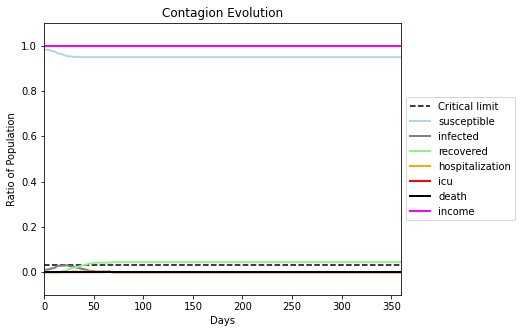

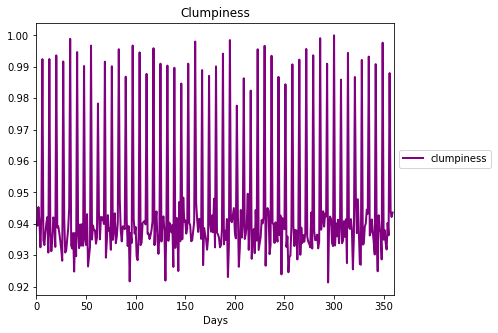

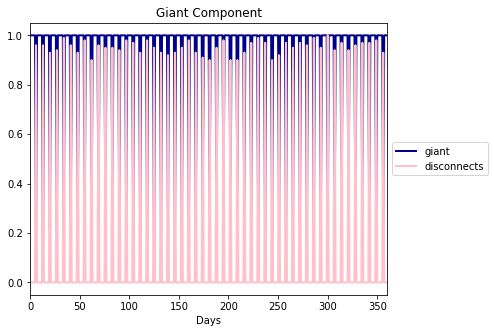

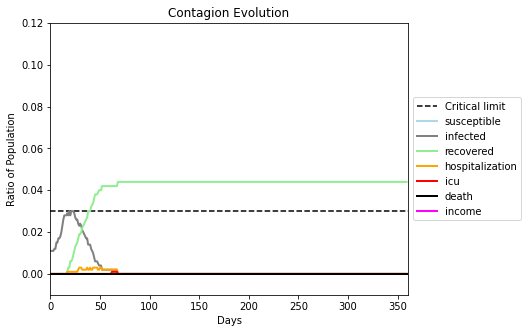

In [4]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -1
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= num_runs,fname = run_prefix+"T-1", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )


Save these seeds if you want to rerun a scenario
[2576]
Average similarity between family members is 0.9903904542475175 at temperature -0.999
Average similarity between family and home is 0.9998904698972512 at temperature -1
Average similarity between students and their classroom is 0.7543302342304276 at temperature -0.999
Average classroom occupancy is 11.478260869565217 and number classrooms is 23
Average similarity between workers is 0.9990120195584553 at temperature -0.999
Average office occupancy is 10.903225806451612 and number offices is 62
Average friend similarity for adults: 0.9997247671957434 for kids: 0.8040555353802153
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 2 people.
Total of 2 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 4 allocated units with a total of 13 people.
T

run with seed 2576:
avg restaurant similarity 0.6154007959909958
clumpiness 0.9651016324955507
maxlen 37
giant component 0.6476648351648352
disconnects 0.59
avg restaurant similarity 0.6513944949602621
clumpiness 0.9512378278486998
maxlen 36
giant component 0.5989010989010989
disconnects 0.41
avg restaurant similarity 0.8048643007640433
clumpiness 0.9600293827801801
maxlen 44
giant component 0.5989010989010989
disconnects 0.52
avg restaurant similarity 0.6698115506187574
clumpiness 0.9439638824081549
maxlen 42
giant component 0.5989010989010989
disconnects 0.44
avg restaurant similarity 0.8625615182537308
clumpiness 0.9551479361498109
maxlen 43
giant component 0.5989010989010989
disconnects 0.43
avg restaurant similarity 0.4608171002864944
clumpiness 0.9547205273204533
maxlen 25
giant component 0.5989010989010989
disconnects 0.51
avg restaurant similarity 0.8020524441070197
clumpiness 0.9922054154995331
maxlen 17
giant component 0.16714490674318508
disconnects 0.94
avg restaurant simil

clumpiness 0.9615397740063641
maxlen 35
giant component 0.5989010989010989
disconnects 0.55
avg restaurant similarity 0.5921352063514039
clumpiness 0.9612800341426707
maxlen 43
giant component 0.5989010989010989
disconnects 0.54
avg restaurant similarity 0.703484880542065
clumpiness 0.990559163059163
maxlen 21
giant component 0.2460545193687231
disconnects 0.93
avg restaurant similarity 0.5834478624885258
clumpiness 0.968918064182722
maxlen 40
giant component 0.5989010989010989
disconnects 0.63
avg restaurant similarity 0.7315763226560111
clumpiness 0.9513412545025267
maxlen 36
giant component 0.5989010989010989
disconnects 0.53
avg restaurant similarity 0.5824756738733791
clumpiness 0.9641657031111079
maxlen 32
giant component 0.5989010989010989
disconnects 0.53
avg restaurant similarity 0.689732544283182
clumpiness 0.9516760230812509
maxlen 37
giant component 0.5989010989010989
disconnects 0.46
avg restaurant similarity 0.7940195934397054
clumpiness 0.9404280355316192
maxlen 37
giant

avg restaurant similarity 0.7399388862346771
clumpiness 0.9507266768683598
maxlen 44
giant component 0.5989010989010989
disconnects 0.49
avg restaurant similarity 0.6389164270206491
clumpiness 0.9589275804533157
maxlen 33
giant component 0.5989010989010989
disconnects 0.54
avg restaurant similarity 0.7498757090998547
clumpiness 0.94802984439668
maxlen 37
giant component 0.5989010989010989
disconnects 0.46
avg restaurant similarity 0.634526037062615
clumpiness 0.953521579697509
maxlen 47
giant component 0.5989010989010989
disconnects 0.44
avg restaurant similarity 0.5491675271475156
clumpiness 0.9913095238095239
maxlen 8
giant component 0.18220946915351507
disconnects 0.95
avg restaurant similarity 0.3989919648047451
clumpiness 0.9705605135007879
maxlen 42
giant component 0.5989010989010989
disconnects 0.6
avg restaurant similarity 0.6346488886702047
clumpiness 0.9614840900133503
maxlen 34
giant component 0.6476648351648352
disconnects 0.54
avg restaurant similarity 0.7049413221398556
c

avg restaurant similarity 0.7651576466924179
clumpiness 0.9618487635439106
maxlen 43
giant component 0.5989010989010989
disconnects 0.51
avg restaurant similarity 0.745188816810155
clumpiness 0.9519470589878812
maxlen 36
giant component 0.5989010989010989
disconnects 0.41
avg restaurant similarity 0.47955704978704483
clumpiness 0.9633328874774448
maxlen 40
giant component 0.6476648351648352
disconnects 0.47
avg restaurant similarity 0.6696754831820617
clumpiness 0.9609961432014837
maxlen 38
giant component 0.6476648351648352
disconnects 0.49
avg restaurant similarity 0.8117192942940696
clumpiness 0.9564242296809999
maxlen 43
giant component 0.5989010989010989
disconnects 0.47
avg restaurant similarity 0.7118640364780061
clumpiness 0.9599691255523366
maxlen 40
giant component 0.5989010989010989
disconnects 0.46
avg restaurant similarity 0.7670690914642174
clumpiness 0.9894379912571089
maxlen 25
giant component 0.3005738880918221
disconnects 0.89
avg restaurant similarity 0.7970807013973

avg restaurant similarity 0.4851112152024241
clumpiness 0.954003372064314
maxlen 41
giant component 0.5989010989010989
disconnects 0.45
avg restaurant similarity 0.6872078262480381
clumpiness 0.9873439436380613
maxlen 22
giant component 0.2833572453371593
disconnects 0.89
avg restaurant similarity 0.6357433888798621
clumpiness 0.9562843903179076
maxlen 35
giant component 0.6476648351648352
disconnects 0.48
avg restaurant similarity 0.6169012944387566
clumpiness 0.9549688121568186
maxlen 42
giant component 0.5989010989010989
disconnects 0.49
avg restaurant similarity 0.4422410065359948
clumpiness 0.9575739783326185
maxlen 32
giant component 0.646978021978022
disconnects 0.48
avg restaurant similarity 0.7539361563673539
clumpiness 0.9474370680637229
maxlen 36
giant component 0.5989010989010989
disconnects 0.45
avg restaurant similarity 0.6802534626072936
clumpiness 0.9554904040166845
maxlen 38
giant component 0.5989010989010989
disconnects 0.46
avg restaurant similarity 0.641551711592209

avg restaurant similarity 0.6422988775428211
clumpiness 0.956195195749558
maxlen 43
giant component 0.5989010989010989
disconnects 0.47
avg restaurant similarity 0.6272869511996656
clumpiness 0.9563586109702409
maxlen 40
giant component 0.5989010989010989
disconnects 0.55
avg restaurant similarity 0.6205906414540334
clumpiness 0.9366248170841078
maxlen 61
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.7371777577090857
clumpiness 0.9913888888888889
maxlen 9
giant component 0.13773314203730272
disconnects 0.96
avg restaurant similarity 0.5759335767169438
clumpiness 0.9466628488279961
maxlen 46
giant component 0.6476648351648352
disconnects 0.42
avg restaurant similarity 0.8027155015140061
clumpiness 0.958461078012165
maxlen 36
giant component 0.5989010989010989
disconnects 0.54
avg restaurant similarity 0.6297727955394674
clumpiness 0.9301961572744528
maxlen 60
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.7360609420570914
clumpiness 0.9334701125836187


(<function dict.items>, <function dict.items>, <function dict.items>)

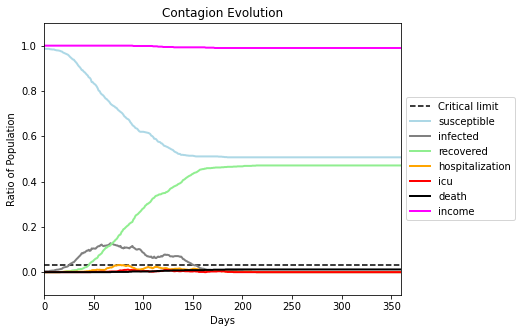

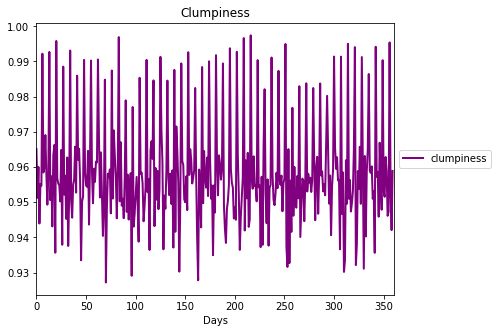

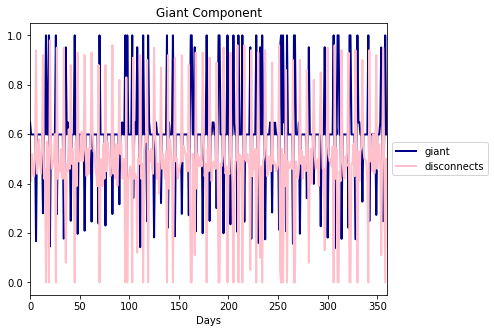

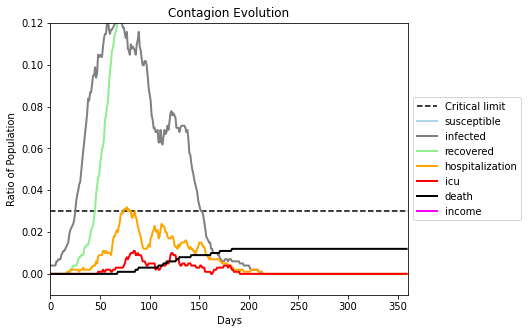

In [5]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.999
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= num_runs,fname = run_prefix+"T-.999", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )


Save these seeds if you want to rerun a scenario
[3215]
Average similarity between family members is 0.9912869043074649 at temperature -0.998
Average similarity between family and home is 0.9998944634138961 at temperature -1
Average similarity between students and their classroom is 0.8127226187611852 at temperature -0.998
Average classroom occupancy is 12.291666666666666 and number classrooms is 24
Average similarity between workers is 0.9776239681948728 at temperature -0.998
Average office occupancy is 9.96923076923077 and number offices is 65
Average friend similarity for adults: 0.9973247253559717 for kids: 0.8747642386715799
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Tota

run with seed 3215:
avg restaurant similarity 0.5439853980502527
clumpiness 0.9417077000652198
maxlen 41
giant component 0.9464161447459986
disconnects 0.12
avg restaurant similarity 0.5977568769250281
clumpiness 0.9407888274064784
maxlen 54
giant component 0.8990953375086986
disconnects 0.21
avg restaurant similarity 0.5872504674974915
clumpiness 0.9432047799974727
maxlen 53
giant component 0.9464161447459986
disconnects 0.13
avg restaurant similarity 0.5931947864559917
clumpiness 0.9565802403324669
maxlen 55
giant component 0.8983994432846207
disconnects 0.25
avg restaurant similarity 0.5031081241222443
clumpiness 0.9339393597670187
maxlen 45
giant component 0.9464161447459986
disconnects 0.1
avg restaurant similarity 0.5069244829229933
clumpiness 0.9464263745412062
maxlen 44
giant component 0.9464161447459986
disconnects 0.14
avg restaurant similarity 0.4773479387781177
clumpiness 0.9823045112781955
maxlen 19
giant component 0.24927113702623907
disconnects 0.87
avg restaurant simila

avg restaurant similarity 0.6292531545897703
clumpiness 0.9599698580260212
maxlen 54
giant component 0.8002783576896312
disconnects 0.36
avg restaurant similarity 0.37528540237527863
clumpiness 0.96149486169941
maxlen 48
giant component 0.5034818941504178
disconnects 0.48
avg restaurant similarity 0.46731467260633736
clumpiness 0.987758547008547
maxlen 15
giant component 0.24125364431486881
disconnects 0.91
avg restaurant similarity 0.3761246634472001
clumpiness 0.956603832788857
maxlen 48
giant component 0.9464161447459986
disconnects 0.14
avg restaurant similarity 0.42884796815296766
clumpiness 0.9345396039670015
maxlen 50
giant component 0.9464161447459986
disconnects 0.08
avg restaurant similarity 0.4999303560095531
clumpiness 0.943993086874735
maxlen 43
giant component 0.9464161447459986
disconnects 0.13
avg restaurant similarity 0.6428488559136037
clumpiness 0.9436629986694258
maxlen 49
giant component 0.9464161447459986
disconnects 0.07
avg restaurant similarity 0.56602817191641

clumpiness 0.9641808075769398
maxlen 46
giant component 0.5518441196938065
disconnects 0.53
avg restaurant similarity 0.6244864138017818
clumpiness 0.938607011026689
maxlen 43
giant component 0.9464161447459986
disconnects 0.15
avg restaurant similarity 0.6064739749599684
clumpiness 0.9437750672029683
maxlen 48
giant component 0.9464161447459986
disconnects 0.16
avg restaurant similarity 0.5419957457032659
clumpiness 0.9413837747183286
maxlen 47
giant component 0.9464161447459986
disconnects 0.12
avg restaurant similarity 0.5601976324202238
clumpiness 0.9410599625983428
maxlen 54
giant component 0.9464161447459986
disconnects 0.06
avg restaurant similarity 0.5054447296574837
clumpiness 0.9881226551226551
maxlen 11
giant component 0.17711370262390672
disconnects 0.93
avg restaurant similarity 0.6632522305461762
clumpiness 0.9293390715476659
maxlen 43
giant component 0.9464161447459986
disconnects 0.09
avg restaurant similarity 0.4380522581571159
clumpiness 0.9505555338655719
maxlen 45
g

clumpiness 0.9377806161454556
maxlen 47
giant component 0.9464161447459986
disconnects 0.12
avg restaurant similarity 0.6631998877120274
clumpiness 0.9857075702075702
maxlen 14
giant component 0.24198250728862974
disconnects 0.89
avg restaurant similarity 0.5062555956803738
clumpiness 0.9479087549532411
maxlen 63
giant component 0.9464161447459986
disconnects 0.1
avg restaurant similarity 0.66791140564318
clumpiness 0.9380401571630375
maxlen 40
giant component 0.9464161447459986
disconnects 0.1
avg restaurant similarity 0.6079063507043746
clumpiness 0.9408876545643933
maxlen 59
giant component 0.9464161447459986
disconnects 0.07
avg restaurant similarity 0.4795819032874456
clumpiness 0.9473999091806811
maxlen 64
giant component 0.9464161447459986
disconnects 0.07
avg restaurant similarity 0.47783999318270226
clumpiness 0.9491906130719314
maxlen 51
giant component 0.9464161447459986
disconnects 0.12
avg restaurant similarity 0.5977844969118786
clumpiness 0.939891844066252
maxlen 44
gian

clumpiness 0.9470552236346816
maxlen 46
giant component 0.9464161447459986
disconnects 0.19
avg restaurant similarity 0.499513023480622
clumpiness 0.9495166229081764
maxlen 39
giant component 0.8016701461377871
disconnects 0.31
avg restaurant similarity 0.41575588624049203
clumpiness 0.9434895174864835
maxlen 47
giant component 0.9464161447459986
disconnects 0.12
avg restaurant similarity 0.5486372973074447
clumpiness 0.9545269891566428
maxlen 49
giant component 0.848990953375087
disconnects 0.28
avg restaurant similarity 0.6208327221075697
clumpiness 0.9924323552264729
maxlen 17
giant component 0.25145772594752186
disconnects 0.91
avg restaurant similarity 0.4871489000830996
clumpiness 0.9580008614158602
maxlen 52
giant component 0.9464161447459986
disconnects 0.12
avg restaurant similarity 0.6887826052135517
clumpiness 0.9366545624983489
maxlen 45
giant component 0.848990953375087
disconnects 0.25
avg restaurant similarity 0.5639646899562678
clumpiness 0.9351853955741006
maxlen 39
gi

avg restaurant similarity 0.5799811765603715
clumpiness 0.9415003345985281
maxlen 41
giant component 0.9464161447459986
disconnects 0.1
avg restaurant similarity 0.5051954833493872
clumpiness 0.9345297575532767
maxlen 39
giant component 0.9464161447459986
disconnects 0.11
avg restaurant similarity 0.5842463067796779
clumpiness 0.9504019160724203
maxlen 46
giant component 0.848990953375087
disconnects 0.28
avg restaurant similarity 0.5312749970570204
clumpiness 0.9400561509696732
maxlen 60
giant component 0.848990953375087
disconnects 0.2
avg restaurant similarity 0.6355321290569349
clumpiness 0.9443562455929141
maxlen 45
giant component 0.9464161447459986
disconnects 0.04
avg restaurant similarity 0.7138958702266878
clumpiness 0.9434147106312788
maxlen 42
giant component 0.848990953375087
disconnects 0.3
avg restaurant similarity 0.6639535346138538
clumpiness 0.9935833333333334
maxlen 15
giant component 0.17638483965014579
disconnects 0.95
avg restaurant similarity 0.5309703959013143
c

(<function dict.items>, <function dict.items>, <function dict.items>)

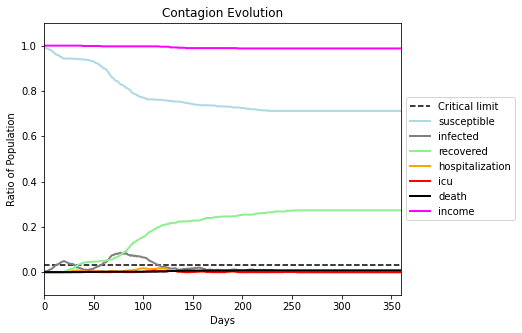

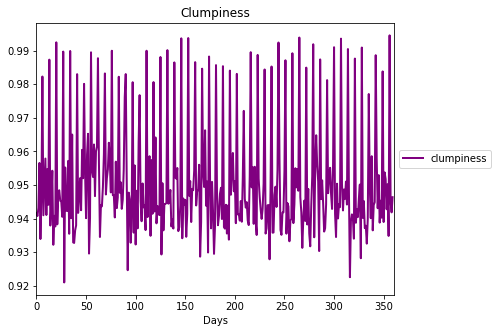

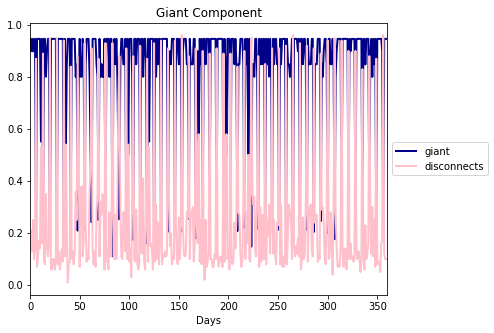

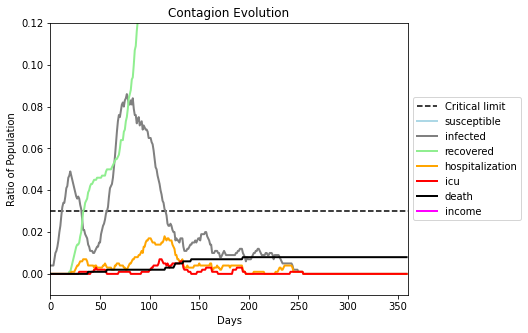

In [6]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.998
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= num_runs,fname = run_prefix+"T-.998", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank)


Save these seeds if you want to rerun a scenario
[6620]
Average similarity between family members is 0.990197729871836 at temperature -0.9975
Average similarity between family and home is 0.9999098379758582 at temperature -1
Average similarity between students and their classroom is 0.7721757662526374 at temperature -0.9975
Average classroom occupancy is 12.583333333333334 and number classrooms is 24
Average similarity between workers is 0.9970086070719729 at temperature -0.9975
Average office occupancy is 9.984375 and number offices is 64
Average friend similarity for adults: 0.9968982926070429 for kids: 0.8520706496606519
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 2 people.
Total of 2

run with seed 6620:
avg restaurant similarity 0.631773421839706
clumpiness 0.9181881273050846
maxlen 26
giant component 0.9937369519832986
disconnects 0.01
avg restaurant similarity 0.5574519747377912
clumpiness 0.9083112405276886
maxlen 40
giant component 0.9937369519832986
disconnects 0.01
avg restaurant similarity 0.538382526030943
clumpiness 0.9225058743390888
maxlen 28
giant component 0.9937369519832986
disconnects 0.01
avg restaurant similarity 0.45164852203860434
clumpiness 0.9159031287738952
maxlen 38
giant component 0.9937369519832986
disconnects 0.01
avg restaurant similarity 0.35085858015958016
clumpiness 0.9197414636230187
maxlen 42
giant component 0.9965205288796103
disconnects 0.0
avg restaurant similarity 0.5140600660316338
clumpiness 0.9346008218781083
maxlen 43
giant component 0.9937369519832986
disconnects 0.03
avg restaurant similarity 0.5601942918036843
clumpiness 0.9557738046238821
maxlen 27
giant component 0.672740524781341
disconnects 0.53
avg restaurant similari

avg restaurant similarity 0.4383912434282804
clumpiness 0.917918298312268
maxlen 25
giant component 0.9937369519832986
disconnects 0.0
avg restaurant similarity 0.43359755082773954
clumpiness 0.9268062085723664
maxlen 37
giant component 0.9937369519832986
disconnects 0.02
avg restaurant similarity 0.4989043248884741
clumpiness 0.9647569496506097
maxlen 24
giant component 0.6678805535324108
disconnects 0.56
avg restaurant similarity 0.6346055301722635
clumpiness 0.9240262729423481
maxlen 37
giant component 0.9965205288796103
disconnects 0.01
avg restaurant similarity 0.5885806155033944
clumpiness 0.9230288086465528
maxlen 41
giant component 0.9937369519832986
disconnects 0.01
avg restaurant similarity 0.5738741693340571
clumpiness 0.9205199124463358
maxlen 39
giant component 0.9937369519832986
disconnects 0.01
avg restaurant similarity 0.406558324914657
clumpiness 0.9113118922634309
maxlen 38
giant component 0.9965205288796103
disconnects 0.0
avg restaurant similarity 0.5858551670547509

clumpiness 0.9147922437876806
maxlen 26
giant component 0.9916492693110647
disconnects 0.05
avg restaurant similarity 0.4737054250506745
clumpiness 0.9150111429050453
maxlen 26
giant component 0.9944328462073765
disconnects 0.01
avg restaurant similarity 0.3931074844849464
clumpiness 0.9139977907865466
maxlen 35
giant component 0.9944328462073765
disconnects 0.01
avg restaurant similarity 0.4611081745930604
clumpiness 0.930488643739994
maxlen 43
giant component 0.9916434540389972
disconnects 0.01
avg restaurant similarity 0.49175893529858206
clumpiness 0.9248378638037208
maxlen 39
giant component 0.9916492693110647
disconnects 0.0
avg restaurant similarity 0.4923274824521054
clumpiness 0.9636605665692007
maxlen 29
giant component 0.7188638018936635
disconnects 0.49
avg restaurant similarity 0.5136918358583348
clumpiness 0.9269460404348763
maxlen 39
giant component 0.9944289693593314
disconnects 0.03
avg restaurant similarity 0.4534190856736008
clumpiness 0.9225251824791828
maxlen 29
gi

clumpiness 0.9221781576538669
maxlen 40
giant component 0.9944328462073765
disconnects 0.02
avg restaurant similarity 0.3874580288548648
clumpiness 0.9592179964949308
maxlen 42
giant component 0.6554989075018208
disconnects 0.5
avg restaurant similarity 0.5223110270383787
clumpiness 0.9165672845074081
maxlen 39
giant component 0.9944328462073765
disconnects 0.0
avg restaurant similarity 0.42805724228179726
clumpiness 0.9089359689177129
maxlen 23
giant component 0.9916492693110647
disconnects 0.01
avg restaurant similarity 0.6128704357636069
clumpiness 0.9275568785796339
maxlen 43
giant component 0.9916492693110647
disconnects 0.01
avg restaurant similarity 0.4455014852094154
clumpiness 0.9260424182839331
maxlen 42
giant component 0.9916492693110647
disconnects 0.02
avg restaurant similarity 0.44868153847936515
clumpiness 0.9206349886305628
maxlen 38
giant component 0.9916492693110647
disconnects 0.0
avg restaurant similarity 0.4013029270808711
clumpiness 0.9161532414224185
maxlen 40
gi

clumpiness 0.9268605239800795
maxlen 39
giant component 0.9944328462073765
disconnects 0.01
avg restaurant similarity 0.5125521163693447
clumpiness 0.9235011940543262
maxlen 38
giant component 0.9944328462073765
disconnects 0.02
avg restaurant similarity 0.551003726526822
clumpiness 0.9255058386753968
maxlen 36
giant component 0.9916492693110647
disconnects 0.02
avg restaurant similarity 0.5015225975255018
clumpiness 0.924730618138984
maxlen 23
giant component 0.9944328462073765
disconnects 0.02
avg restaurant similarity 0.5496727083568524
clumpiness 0.9662021218063181
maxlen 28
giant component 0.7246904588492352
disconnects 0.48
avg restaurant similarity 0.42853614641763643
clumpiness 0.9268601322743697
maxlen 41
giant component 0.9916492693110647
disconnects 0.04
avg restaurant similarity 0.46620799299589305
clumpiness 0.9210871179893727
maxlen 28
giant component 0.9944328462073765
disconnects 0.02
avg restaurant similarity 0.43373410911344973
clumpiness 0.9132710523448275
maxlen 30


clumpiness 0.9533101021618343
maxlen 30
giant component 0.7232337946103423
disconnects 0.4
avg restaurant similarity 0.4293077438713382
clumpiness 0.9225491665544051
maxlen 31
giant component 0.9916492693110647
disconnects 0.03
avg restaurant similarity 0.475576775423969
clumpiness 0.9074046353281783
maxlen 24
giant component 0.9916492693110647
disconnects 0.02
avg restaurant similarity 0.40693740910162446
clumpiness 0.924331084035267
maxlen 33
giant component 0.9916492693110647
disconnects 0.0
avg restaurant similarity 0.5509673118253672
clumpiness 0.9240916088629056
maxlen 36
giant component 0.9916492693110647
disconnects 0.0
avg restaurant similarity 0.4245874506790974
clumpiness 0.9194858611142608
maxlen 32
giant component 0.9944328462073765
disconnects 0.01
avg restaurant similarity 0.30724097643215054
clumpiness 0.9173521113080745
maxlen 27
giant component 0.9944328462073765
disconnects 0.0
avg restaurant similarity 0.5011779212423034
clumpiness 0.9660179939294303
maxlen 29
giant

(<function dict.items>, <function dict.items>, <function dict.items>)

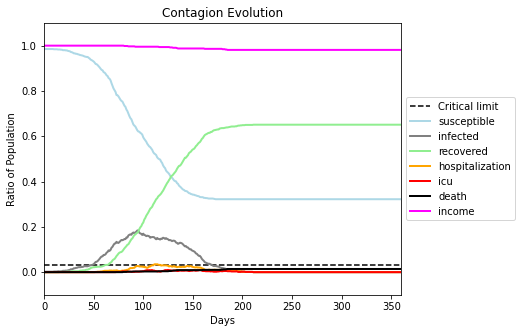

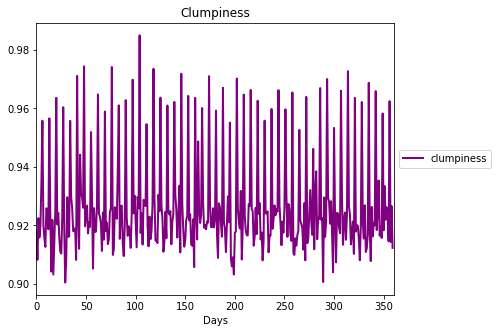

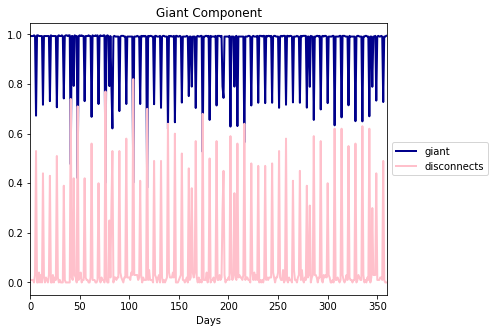

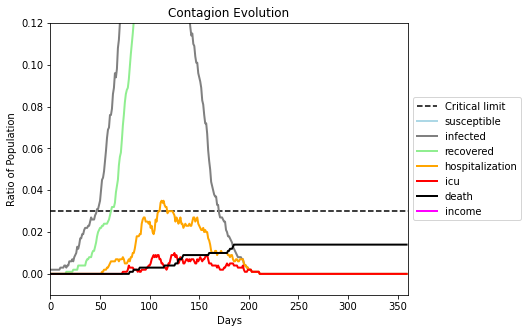

In [7]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.9975
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= num_runs,fname = run_prefix+"T-.9975", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank= compute_hoprank)


Save these seeds if you want to rerun a scenario
[9103]
Average similarity between family members is 0.9889826285844014 at temperature -0.997
Average similarity between family and home is 0.9998657405975483 at temperature -1
Average similarity between students and their classroom is 0.5685932442853666 at temperature -0.997
Average classroom occupancy is 12.083333333333334 and number classrooms is 24
Average similarity between workers is 0.9793608732326659 at temperature -0.997
Average office occupancy is 10.076923076923077 and number offices is 65
Average friend similarity for adults: 0.9934868729172731 for kids: 0.7057490018876003
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 2 people.
Total of 2 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 3 people.
To

run with seed 9103:
avg restaurant similarity 0.4053734322605701
clumpiness 0.9149330963796976
maxlen 30
giant component 0.9986282578875172
disconnects 0.0
avg restaurant similarity 0.3428741525456296
clumpiness 0.9211440348574977
maxlen 31
giant component 0.9986282578875172
disconnects 0.0
avg restaurant similarity 0.397335242761747
clumpiness 0.9225753153328125
maxlen 35
giant component 0.9986282578875172
disconnects 0.0
avg restaurant similarity 0.3183508213506783
clumpiness 0.9130505565443814
maxlen 26
giant component 0.9986282578875172
disconnects 0.0
avg restaurant similarity 0.452124829847069
clumpiness 0.9164722190434265
maxlen 24
giant component 0.9986282578875172
disconnects 0.0
avg restaurant similarity 0.3906818873529301
clumpiness 0.9085428793635485
maxlen 27
giant component 0.9986282578875172
disconnects 0.0
avg restaurant similarity 0.6063369998042798
clumpiness 0.9775690894073247
maxlen 24
giant component 0.47738693467336685
disconnects 0.78
avg restaurant similarity 0.

avg restaurant similarity 0.5658216758293036
clumpiness 0.9146690050874329
maxlen 24
giant component 0.9986282578875172
disconnects 0.0
avg restaurant similarity 0.6154293099182891
clumpiness 0.9227094587851281
maxlen 35
giant component 0.9986282578875172
disconnects 0.0
avg restaurant similarity 0.4764796837323117
clumpiness 0.9724507955447884
maxlen 31
giant component 0.5979899497487438
disconnects 0.65
avg restaurant similarity 0.3256644988807015
clumpiness 0.9303772943147182
maxlen 41
giant component 0.9986282578875172
disconnects 0.01
avg restaurant similarity 0.5060438886359209
clumpiness 0.9144065646102899
maxlen 26
giant component 0.9986282578875172
disconnects 0.0
avg restaurant similarity 0.7149507038985522
clumpiness 0.9191748558419198
maxlen 29
giant component 0.9986282578875172
disconnects 0.0
avg restaurant similarity 0.6228054613613874
clumpiness 0.9131775764804437
maxlen 23
giant component 0.9986282578875172
disconnects 0.0
avg restaurant similarity 0.6234376431606389
c

avg restaurant similarity 0.47702789887982816
clumpiness 0.9147408640671832
maxlen 27
giant component 0.9972565157750343
disconnects 0.0
avg restaurant similarity 0.4198768403634914
clumpiness 0.9228767004444197
maxlen 34
giant component 0.9972565157750343
disconnects 0.01
avg restaurant similarity 0.3967956901508235
clumpiness 0.918425281361898
maxlen 23
giant component 0.9972565157750343
disconnects 0.01
avg restaurant similarity 0.44127913487773335
clumpiness 0.9196096730981861
maxlen 32
giant component 0.9972565157750343
disconnects 0.01
avg restaurant similarity 0.36806511779149603
clumpiness 0.9224634455228482
maxlen 32
giant component 0.9972565157750343
disconnects 0.0
avg restaurant similarity 0.3079939321646168
clumpiness 0.9766660108896951
maxlen 21
giant component 0.5549174443646806
disconnects 0.73
avg restaurant similarity 0.5479212076093457
clumpiness 0.9193924454749827
maxlen 34
giant component 0.9972565157750343
disconnects 0.01
avg restaurant similarity 0.4412824210949

clumpiness 0.9204917970698531
maxlen 40
giant component 0.99519890260631
disconnects 0.02
avg restaurant similarity 0.47207885859239984
clumpiness 0.965346194055492
maxlen 28
giant component 0.5900933237616655
disconnects 0.56
avg restaurant similarity 0.48955048477417573
clumpiness 0.9219238796557885
maxlen 27
giant component 0.99519890260631
disconnects 0.01
avg restaurant similarity 0.623669891451063
clumpiness 0.9215261474289667
maxlen 29
giant component 0.99519890260631
disconnects 0.0
avg restaurant similarity 0.434356179763592
clumpiness 0.9178719756863787
maxlen 27
giant component 0.99519890260631
disconnects 0.01
avg restaurant similarity 0.36679392465723437
clumpiness 0.9167112789562581
maxlen 27
giant component 0.99519890260631
disconnects 0.0
avg restaurant similarity 0.47520189412540825
clumpiness 0.9184336270721507
maxlen 31
giant component 0.99519890260631
disconnects 0.0
avg restaurant similarity 0.42148741128800576
clumpiness 0.9133729723153144
maxlen 36
giant componen

avg restaurant similarity 0.3399381044963462
clumpiness 0.9142994817617883
maxlen 25
giant component 0.9938271604938271
disconnects 0.02
avg restaurant similarity 0.4102719588221246
clumpiness 0.9109058386723282
maxlen 24
giant component 0.9938271604938271
disconnects 0.04
avg restaurant similarity 0.5317612731705829
clumpiness 0.923425052469674
maxlen 30
giant component 0.9938271604938271
disconnects 0.0
avg restaurant similarity 0.3742593204401876
clumpiness 0.9719232878267742
maxlen 38
giant component 0.5900933237616655
disconnects 0.66
avg restaurant similarity 0.36164022205719537
clumpiness 0.9156900924010551
maxlen 39
giant component 0.9938271604938271
disconnects 0.02
avg restaurant similarity 0.36492833472373953
clumpiness 0.916869667535887
maxlen 34
giant component 0.9938271604938271
disconnects 0.01
avg restaurant similarity 0.6292535858965727
clumpiness 0.9201773406751836
maxlen 34
giant component 0.9938271604938271
disconnects 0.01
avg restaurant similarity 0.32364000842903

avg restaurant similarity 0.42924108942954714
clumpiness 0.9237606547078852
maxlen 27
giant component 0.9938271604938271
disconnects 0.01
avg restaurant similarity 0.29627985248692706
clumpiness 0.9212906567628839
maxlen 26
giant component 0.9938271604938271
disconnects 0.0
avg restaurant similarity 0.31007011696319664
clumpiness 0.9198327671640366
maxlen 21
giant component 0.9938271604938271
disconnects 0.03
avg restaurant similarity 0.2815240687455082
clumpiness 0.9185168429513733
maxlen 27
giant component 0.9938271604938271
disconnects 0.01
avg restaurant similarity 0.44156344192105174
clumpiness 0.9237326151230951
maxlen 21
giant component 0.9938271604938271
disconnects 0.03
avg restaurant similarity 0.39798503095623355
clumpiness 0.9149364923690002
maxlen 26
giant component 0.9938271604938271
disconnects 0.02
avg restaurant similarity 0.4213031883979294
clumpiness 0.9516712518969506
maxlen 35
giant component 0.7150035893754487
disconnects 0.4
avg restaurant similarity 0.3247241468

(<function dict.items>, <function dict.items>, <function dict.items>)

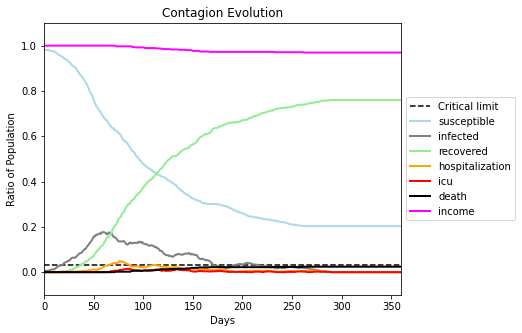

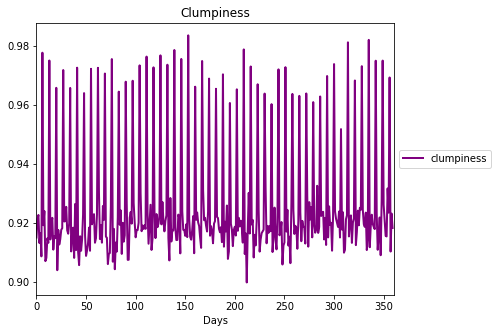

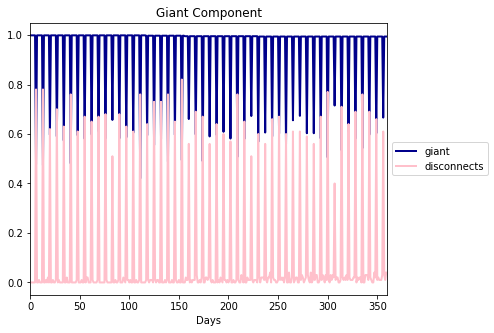

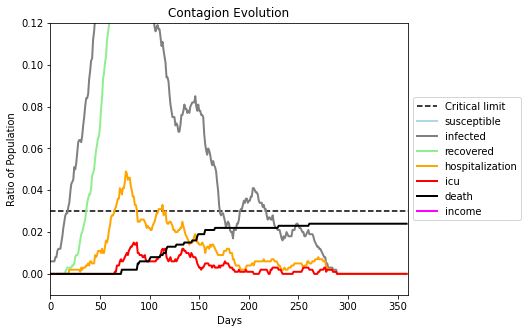

In [8]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.997
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= num_runs,fname = run_prefix+"T-.997", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank)


Save these seeds if you want to rerun a scenario
[4801]
Average similarity between family members is 0.992399771794935 at temperature -0.996
Average similarity between family and home is 0.9998991640059899 at temperature -1
Average similarity between students and their classroom is 0.5766751377188065 at temperature -0.996
Average classroom occupancy is 11.416666666666666 and number classrooms is 24
Average similarity between workers is 0.9866704962629259 at temperature -0.996
Average office occupancy is 10.106060606060606 and number offices is 66
Average friend similarity for adults: 0.996185044852112 for kids: 0.753967807321884
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 1 people.
Total of 1 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 2 people.
Total

run with seed 4801:
avg restaurant similarity 0.4859151975485306
clumpiness 0.9064855082545519
maxlen 25
giant component 0.9979423868312757
disconnects 0.01
avg restaurant similarity 0.4245258964997636
clumpiness 0.9082317509494788
maxlen 30
giant component 0.9979423868312757
disconnects 0.0
avg restaurant similarity 0.5457034953643116
clumpiness 0.9023166654037398
maxlen 21
giant component 0.9979423868312757
disconnects 0.0
avg restaurant similarity 0.5115332852801092
clumpiness 0.9131667873727506
maxlen 25
giant component 0.9979423868312757
disconnects 0.0
avg restaurant similarity 0.5408569779184074
clumpiness 0.9074545590867606
maxlen 23
giant component 0.9979423868312757
disconnects 0.0
avg restaurant similarity 0.6885497027871482
clumpiness 0.9083989980006235
maxlen 25
giant component 0.9979423868312757
disconnects 0.01
avg restaurant similarity 0.47057256357415295
clumpiness 0.9597091901174012
maxlen 25
giant component 0.673132183908046
disconnects 0.55
avg restaurant similarity

avg restaurant similarity 0.5683176171894548
clumpiness 0.915480155121796
maxlen 24
giant component 0.9958847736625515
disconnects 0.0
avg restaurant similarity 0.5354394468631863
clumpiness 0.9184962145417288
maxlen 24
giant component 0.9958847736625515
disconnects 0.0
avg restaurant similarity 0.5333893257484021
clumpiness 0.971014542465017
maxlen 37
giant component 0.6867816091954023
disconnects 0.56
avg restaurant similarity 0.5063493816488194
clumpiness 0.9136237933761996
maxlen 24
giant component 0.9958847736625515
disconnects 0.04
avg restaurant similarity 0.5008171049287543
clumpiness 0.9207693411399328
maxlen 23
giant component 0.9958847736625515
disconnects 0.0
avg restaurant similarity 0.5202049792578612
clumpiness 0.9232034892628647
maxlen 25
giant component 0.9458161865569273
disconnects 0.12
avg restaurant similarity 0.5453603439189668
clumpiness 0.9186123830459038
maxlen 28
giant component 0.9958847736625515
disconnects 0.01
avg restaurant similarity 0.5014443974697692
c

clumpiness 0.9119892218223589
maxlen 23
giant component 0.9958819492107069
disconnects 0.0
avg restaurant similarity 0.6299276415022764
clumpiness 0.9138380540855773
maxlen 25
giant component 0.9958847736625515
disconnects 0.01
avg restaurant similarity 0.5916089540586694
clumpiness 0.9158787417582344
maxlen 24
giant component 0.9958847736625515
disconnects 0.02
avg restaurant similarity 0.5361053638851998
clumpiness 0.9148330883490361
maxlen 25
giant component 0.9958847736625515
disconnects 0.0
avg restaurant similarity 0.5324483619787934
clumpiness 0.9154499705380544
maxlen 23
giant component 0.9958847736625515
disconnects 0.01
avg restaurant similarity 0.8155293574268281
clumpiness 0.9618213137888868
maxlen 25
giant component 0.625
disconnects 0.62
avg restaurant similarity 0.6314399570194634
clumpiness 0.9224346746024799
maxlen 23
giant component 0.9958847736625515
disconnects 0.04
avg restaurant similarity 0.6302439708128669
clumpiness 0.9160983904595428
maxlen 24
giant component 

clumpiness 0.9689936749136506
maxlen 24
giant component 0.6508620689655172
disconnects 0.58
avg restaurant similarity 0.7114032803180872
clumpiness 0.9107182448591926
maxlen 26
giant component 0.9917695473251029
disconnects 0.0
avg restaurant similarity 0.6324413095657189
clumpiness 0.9197937672642041
maxlen 24
giant component 0.9917695473251029
disconnects 0.03
avg restaurant similarity 0.6050493989093448
clumpiness 0.9109281439664567
maxlen 22
giant component 0.9917695473251029
disconnects 0.04
avg restaurant similarity 0.5192474495220886
clumpiness 0.9125555496424725
maxlen 24
giant component 0.9917695473251029
disconnects 0.02
avg restaurant similarity 0.5730129714028489
clumpiness 0.9212573195501248
maxlen 27
giant component 0.9917695473251029
disconnects 0.04
avg restaurant similarity 0.664834789772697
clumpiness 0.9071549109788275
maxlen 27
giant component 0.9917695473251029
disconnects 0.01
avg restaurant similarity 0.516665011691055
clumpiness 0.9638085939700558
maxlen 28
gian

clumpiness 0.9170422606009327
maxlen 23
giant component 0.9917695473251029
disconnects 0.01
avg restaurant similarity 0.6353529450216618
clumpiness 0.90366053221804
maxlen 25
giant component 0.9917695473251029
disconnects 0.0
avg restaurant similarity 0.7052800595557309
clumpiness 0.91292653244775
maxlen 28
giant component 0.9917695473251029
disconnects 0.01
avg restaurant similarity 0.46712204878439745
clumpiness 0.9591195746646278
maxlen 27
giant component 0.7040229885057471
disconnects 0.49
avg restaurant similarity 0.5587400789753886
clumpiness 0.9235098164219682
maxlen 24
giant component 0.9417009602194787
disconnects 0.16
avg restaurant similarity 0.6102113695565536
clumpiness 0.9131619724142238
maxlen 26
giant component 0.9917695473251029
disconnects 0.02
avg restaurant similarity 0.5850906387840902
clumpiness 0.9116825958568286
maxlen 24
giant component 0.9917695473251029
disconnects 0.01
avg restaurant similarity 0.4831473896651251
clumpiness 0.9137820276558667
maxlen 22
giant

avg restaurant similarity 0.5894846712680064
clumpiness 0.9043946072137283
maxlen 23
giant component 0.9917695473251029
disconnects 0.01
avg restaurant similarity 0.49604103515305703
clumpiness 0.9145174616554682
maxlen 23
giant component 0.9917695473251029
disconnects 0.01
avg restaurant similarity 0.5335637244161673
clumpiness 0.9222133061096683
maxlen 27
giant component 0.9917695473251029
disconnects 0.03
avg restaurant similarity 0.49920118384793183
clumpiness 0.901928885485
maxlen 24
giant component 0.9917695473251029
disconnects 0.0
avg restaurant similarity 0.4998627102611669
clumpiness 0.9112518521210472
maxlen 22
giant component 0.9917695473251029
disconnects 0.04
avg restaurant similarity 0.4411833754579872
clumpiness 0.9557826532181323
maxlen 31
giant component 0.6810344827586207
disconnects 0.51
avg restaurant similarity 0.5696453264800311
clumpiness 0.9191376928336816
maxlen 27
giant component 0.9917695473251029
disconnects 0.01
avg restaurant similarity 0.4755077678356304

(<function dict.items>, <function dict.items>, <function dict.items>)

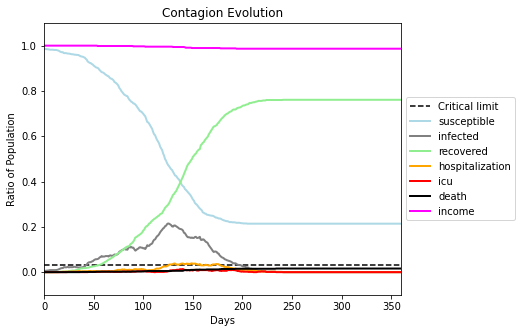

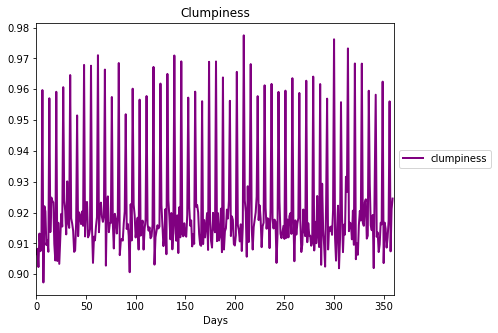

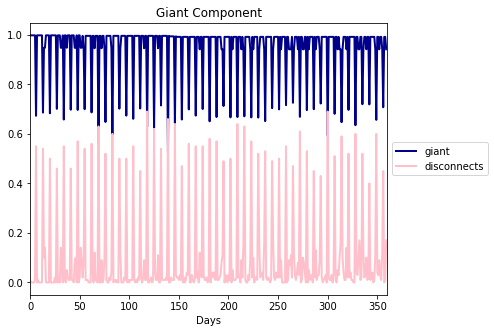

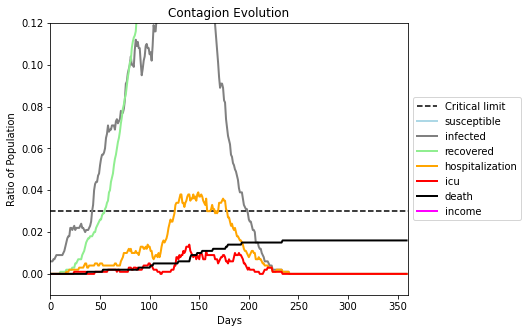

In [9]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.996
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= num_runs,fname = run_prefix+"T-.996", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank)


Save these seeds if you want to rerun a scenario
[5394]
Average similarity between family members is 0.9851248197218033 at temperature -0.995
Average similarity between family and home is 0.9999009835161415 at temperature -1
Average similarity between students and their classroom is 0.6240279897963421 at temperature -0.995
Average classroom occupancy is 12 and number classrooms is 24
Average similarity between workers is 0.9584471575472251 at temperature -0.995
Average office occupancy is 10.06060606060606 and number offices is 66
Average friend similarity for adults: 0.9918314058501917 for kids: 0.7181686099441458
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 people a

run with seed 5394:
avg restaurant similarity 0.48110618563259183
clumpiness 0.9097405637276381
maxlen 26
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5033098414621303
clumpiness 0.9089828037042501
maxlen 27
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5732911302109622
clumpiness 0.9148740730930427
maxlen 25
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.557124596731618
clumpiness 0.9169865991571134
maxlen 26
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.46335834079124855
clumpiness 0.9065635188255158
maxlen 26
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6260977189566915
clumpiness 0.9142081975234873
maxlen 32
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6618677534625529
clumpiness 0.9784815371934567
maxlen 25
giant component 0.505407354001442
disconnects 0.76
avg restaurant similarity 0.5387322994308558
clumpiness 0.9134112444698685
maxlen 29
giant component 1.0
disconnects 

clumpiness 0.919852883455367
maxlen 25
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5214500896207901
clumpiness 0.9068347955812454
maxlen 23
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6053741784151659
clumpiness 0.9114081456876383
maxlen 25
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.536242672386333
clumpiness 0.9674424512796557
maxlen 33
giant component 0.6611391492429705
disconnects 0.64
avg restaurant similarity 0.5050723944787678
clumpiness 0.9073624303113468
maxlen 21
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.61266552125597
clumpiness 0.9136721913805573
maxlen 27
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6437554284641863
clumpiness 0.9163699433950983
maxlen 24
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.688201764891952
clumpiness 0.9131777983368541
maxlen 22
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5732141309677002
clumpiness 0.90741116

avg restaurant similarity 0.448353021269869
clumpiness 0.9122185590914281
maxlen 29
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5259785572379454
clumpiness 0.9137547399058563
maxlen 37
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.4862245119044244
clumpiness 0.9154419984126642
maxlen 30
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5422350308628989
clumpiness 0.9095233513597325
maxlen 33
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5028650159122383
clumpiness 0.9132783055307117
maxlen 23
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5353677107504048
clumpiness 0.9139454246752337
maxlen 23
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5762931163158475
clumpiness 0.9631236284117176
maxlen 31
giant component 0.6568132660418169
disconnects 0.52
avg restaurant similarity 0.5475136526293221
clumpiness 0.9135646605264287
maxlen 26
giant component 1.0
disconnects 0.0
avg restaurant si

avg restaurant similarity 0.5720989027533168
clumpiness 0.9179267149255674
maxlen 25
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5439046630446692
clumpiness 0.9114325372826921
maxlen 27
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6239209428561578
clumpiness 0.9638867400379044
maxlen 23
giant component 0.5090122566690699
disconnects 0.7
avg restaurant similarity 0.6438504922715863
clumpiness 0.9167290718397529
maxlen 30
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.44036789348501265
clumpiness 0.9177058081237648
maxlen 30
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5470552381080611
clumpiness 0.908442034030118
maxlen 26
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5410426819857171
clumpiness 0.9133188518134474
maxlen 28
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5575422149023102
clumpiness 0.9046555251434576
maxlen 27
giant component 1.0
disconnects 0.0
avg restaurant si

clumpiness 0.9150301854871977
maxlen 29
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5467815397760923
clumpiness 0.9184085704835739
maxlen 27
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6008146554845393
clumpiness 0.9119315172398832
maxlen 25
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5666501607175853
clumpiness 0.9086625733056074
maxlen 25
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5558572708422046
clumpiness 0.9104895246658439
maxlen 27
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.37922027830046673
clumpiness 0.9162377461009849
maxlen 24
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.43093969611080485
clumpiness 0.9681773699136256
maxlen 29
giant component 0.6452775775054074
disconnects 0.59
avg restaurant similarity 0.6534292688585811
clumpiness 0.919958922013057
maxlen 29
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.559510826025491
clumpiness 0.914

avg restaurant similarity 0.5006979889052702
clumpiness 0.9080777334419817
maxlen 23
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6850375717390583
clumpiness 0.9083088739704133
maxlen 27
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6069170393125155
clumpiness 0.9784145375477487
maxlen 24
giant component 0.5277577505407354
disconnects 0.76
avg restaurant similarity 0.5581442285968946
clumpiness 0.9018919216038446
maxlen 23
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.512277571691291
clumpiness 0.9169782274519925
maxlen 27
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.40764485926224225
clumpiness 0.9071419933970605
maxlen 36
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6194818589611406
clumpiness 0.9090219494277578
maxlen 24
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6091069239456609
clumpiness 0.9085400316607267
maxlen 29
giant component 1.0
disconnects 0.0
avg restaurant s

(<function dict.items>, <function dict.items>, <function dict.items>)

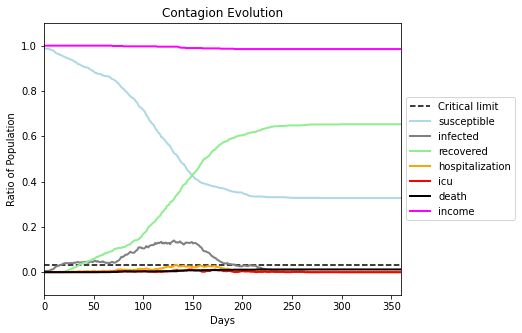

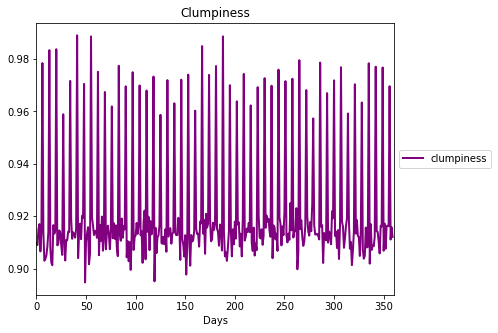

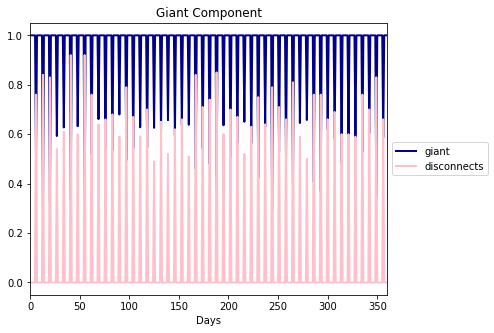

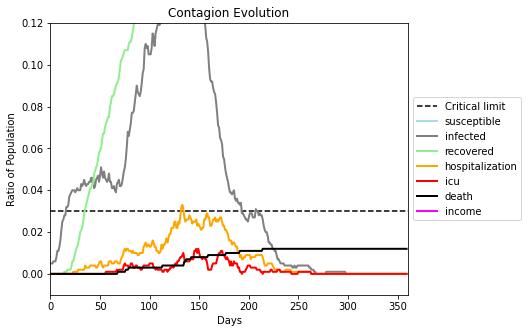

In [10]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.995
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= num_runs,fname = run_prefix+"T-.995", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank= compute_hoprank)


Save these seeds if you want to rerun a scenario
[9473]
Average similarity between family members is 0.9854394514758046 at temperature -0.994
Average similarity between family and home is 0.9999052699438153 at temperature -1
Average similarity between students and their classroom is 0.6736123182803028 at temperature -0.994
Average classroom occupancy is 11.291666666666666 and number classrooms is 24
Average similarity between workers is 0.953071438720129 at temperature -0.994
Average office occupancy is 10.151515151515152 and number offices is 66
Average friend similarity for adults: 0.984814368424006 for kids: 0.7589169415577246
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Tota

avg restaurant similarity 0.5244835211816151
clumpiness 0.9066804286614658
maxlen 24
giant component 0.9979267449896337
disconnects 0.0
avg restaurant similarity 0.4876136041685864
clumpiness 0.9043132160666991
maxlen 22
giant component 0.9979281767955801
disconnects 0.01
avg restaurant similarity 0.43799394848576634
clumpiness 0.8969328947626162
maxlen 22
giant component 0.9979281767955801
disconnects 0.0
avg restaurant similarity 0.40547282071161117
clumpiness 0.9171509679261227
maxlen 21
giant component 0.9475138121546961
disconnects 0.16
avg restaurant similarity 0.6082558059851313
clumpiness 0.9125021072987824
maxlen 23
giant component 0.9468232044198895
disconnects 0.09
avg restaurant similarity 0.48058131824747075
clumpiness 0.9167846907822141
maxlen 26
giant component 0.9979281767955801
disconnects 0.0
avg restaurant similarity 0.628175381193736
clumpiness 0.9743771131986629
maxlen 30
giant component 0.36857349746560464
disconnects 0.76
avg restaurant similarity 0.5490597385354

clumpiness 0.9148415576081985
maxlen 22
giant component 0.9475138121546961
disconnects 0.05
avg restaurant similarity 0.5420622188272328
clumpiness 0.9156739733005214
maxlen 20
giant component 0.9468232044198895
disconnects 0.09
avg restaurant similarity 0.5392280124906508
clumpiness 0.9626106112490641
maxlen 42
giant component 0.7081824764663287
disconnects 0.47
avg restaurant similarity 0.5297146268203751
clumpiness 0.9056306376951149
maxlen 23
giant component 0.9979281767955801
disconnects 0.01
avg restaurant similarity 0.5803199357946478
clumpiness 0.9091287094977532
maxlen 23
giant component 0.9979281767955801
disconnects 0.0
avg restaurant similarity 0.5420710917167137
clumpiness 0.912235712359013
maxlen 23
giant component 0.9979281767955801
disconnects 0.01
avg restaurant similarity 0.632269834107775
clumpiness 0.9103419523802652
maxlen 20
giant component 0.9475138121546961
disconnects 0.08
avg restaurant similarity 0.45847938339710376
clumpiness 0.9135955732004495
maxlen 22
gia

clumpiness 0.9092397559160751
maxlen 23
giant component 0.9979267449896337
disconnects 0.0
avg restaurant similarity 0.3836792991359698
clumpiness 0.9258397703816502
maxlen 23
giant component 0.9474775397373877
disconnects 0.14
avg restaurant similarity 0.417632124677713
clumpiness 0.9096032242181624
maxlen 21
giant component 0.9474775397373877
disconnects 0.08
avg restaurant similarity 0.41559576824709693
clumpiness 0.906373085720609
maxlen 22
giant component 0.9965469613259669
disconnects 0.0
avg restaurant similarity 0.36344127055012976
clumpiness 0.9183762824012858
maxlen 24
giant component 0.9461325966850829
disconnects 0.11
avg restaurant similarity 0.4234696393826882
clumpiness 0.9609227483319689
maxlen 30
giant component 0.7007246376811594
disconnects 0.5
avg restaurant similarity 0.5143641987181065
clumpiness 0.9000836779039599
maxlen 23
giant component 0.9965469613259669
disconnects 0.01
avg restaurant similarity 0.38574316137726106
clumpiness 0.9192536658107899
maxlen 24
gia

clumpiness 0.9203268857602517
maxlen 26
giant component 0.9965469613259669
disconnects 0.01
avg restaurant similarity 0.4948844665878651
clumpiness 0.9640839327660569
maxlen 23
giant component 0.6951484431571325
disconnects 0.56
avg restaurant similarity 0.5707735729347044
clumpiness 0.9141430216240588
maxlen 21
giant component 0.9461325966850829
disconnects 0.09
avg restaurant similarity 0.4591090297992894
clumpiness 0.9061692531324884
maxlen 30
giant component 0.9461325966850829
disconnects 0.09
avg restaurant similarity 0.47634571193342745
clumpiness 0.9163600268410641
maxlen 21
giant component 0.9461325966850829
disconnects 0.11
avg restaurant similarity 0.5363024216550503
clumpiness 0.9120055062905716
maxlen 23
giant component 0.9461325966850829
disconnects 0.09
avg restaurant similarity 0.49644114472949125
clumpiness 0.9096183739291326
maxlen 22
giant component 0.9965469613259669
disconnects 0.0
avg restaurant similarity 0.39520480738113306
clumpiness 0.9063710905107965
maxlen 18

clumpiness 0.9147958337242393
maxlen 20
giant component 0.9461325966850829
disconnects 0.1
avg restaurant similarity 0.4581335068194612
clumpiness 0.9156345571932294
maxlen 23
giant component 0.9461325966850829
disconnects 0.12
avg restaurant similarity 0.5121781593469777
clumpiness 0.9066537641495072
maxlen 22
giant component 0.9461325966850829
disconnects 0.13
avg restaurant similarity 0.5112932505622702
clumpiness 0.9167539061042158
maxlen 26
giant component 0.9965469613259669
disconnects 0.01
avg restaurant similarity 0.4243760476135121
clumpiness 0.9603359804146202
maxlen 31
giant component 0.683068017366136
disconnects 0.52
avg restaurant similarity 0.48355799234362695
clumpiness 0.9211213350203289
maxlen 24
giant component 0.9461325966850829
disconnects 0.14
avg restaurant similarity 0.525927441410046
clumpiness 0.9220605826062482
maxlen 22
giant component 0.9461325966850829
disconnects 0.1
avg restaurant similarity 0.45815806485687716
clumpiness 0.9056859368271908
maxlen 24
gia

clumpiness 0.9579867117241258
maxlen 38
giant component 0.6620839363241678
disconnects 0.48
avg restaurant similarity 0.46926997899187833
clumpiness 0.9154598990489925
maxlen 24
giant component 0.9461325966850829
disconnects 0.06
avg restaurant similarity 0.47613757446381977
clumpiness 0.9244879625317775
maxlen 24
giant component 0.9461325966850829
disconnects 0.1
avg restaurant similarity 0.47150532391899436
clumpiness 0.9127659325366757
maxlen 25
giant component 0.9460953697304768
disconnects 0.1
avg restaurant similarity 0.562068950681393
clumpiness 0.9107415713390273
maxlen 30
giant component 0.9461325966850829
disconnects 0.1
avg restaurant similarity 0.5133386918442072
clumpiness 0.9096694469960724
maxlen 24
giant component 0.9461325966850829
disconnects 0.07
avg restaurant similarity 0.570670795772611
clumpiness 0.9112407088955078
maxlen 21
giant component 0.9461325966850829
disconnects 0.06
avg restaurant similarity 0.6212820448890876
clumpiness 0.9603143142333365
maxlen 31
gia

(<function dict.items>, <function dict.items>, <function dict.items>)

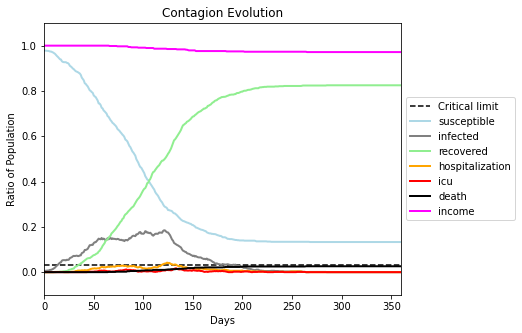

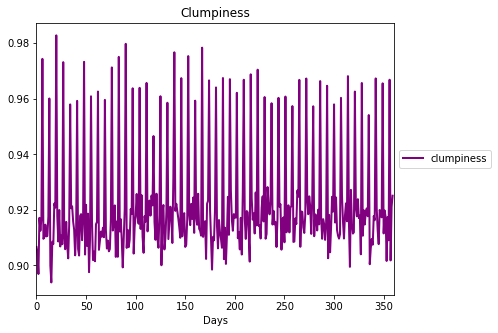

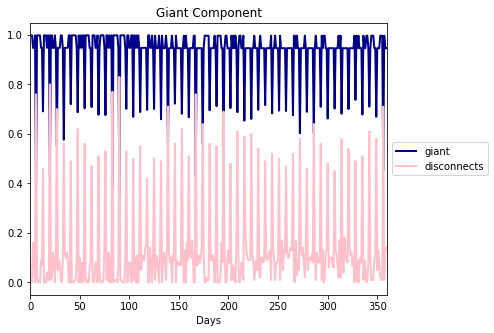

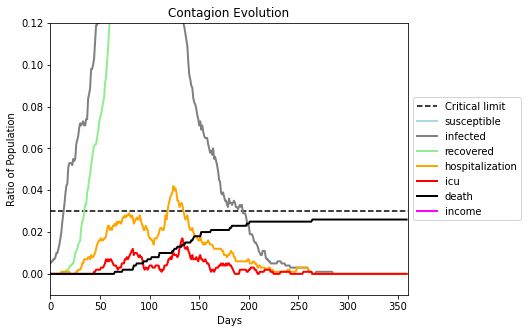

In [11]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.994
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= num_runs,fname = run_prefix+"T-.994", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank)


Save these seeds if you want to rerun a scenario
[733]
Average similarity between family members is 0.9904295917050414 at temperature -0.993
Average similarity between family and home is 0.9998843556002389 at temperature -1
Average similarity between students and their classroom is 0.5814727754184197 at temperature -0.993
Average classroom occupancy is 10.875 and number classrooms is 24
Average similarity between workers is 0.9517184869451152 at temperature -0.993
Average office occupancy is 10.569230769230769 and number offices is 65
Average friend similarity for adults: 0.9811169468518837 for kids: 0.6759101957128391
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 1 people.
Total of 1 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 peop

avg restaurant similarity 0.566892288237266
clumpiness 0.905340993973347
maxlen 18
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.4311892519700597
clumpiness 0.9054701673025977
maxlen 21
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.45375072297395197
clumpiness 0.9066995859747409
maxlen 20
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5571805599749853
clumpiness 0.9113585479278205
maxlen 20
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.42459638279423045
clumpiness 0.911886433011433
maxlen 21
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.4121016226424163
clumpiness 0.896387078006273
maxlen 19
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6742891762069463
clumpiness 0.9651179465783316
maxlen 28
giant component 0.6635780470420527
disconnects 0.51
avg restaurant similarity 0.5248488846462702
clumpiness 0.9027857955168327
maxlen 21
giant component 1.0
disconnects 0.0
avg restaurant sim

avg restaurant similarity 0.3348968698578556
clumpiness 0.9014095118847442
maxlen 20
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.43038207061352535
clumpiness 0.9014191668324796
maxlen 20
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.4785547867496089
clumpiness 0.9588207656636449
maxlen 21
giant component 0.6735566642908054
disconnects 0.54
avg restaurant similarity 0.5264151510748298
clumpiness 0.9083845266360747
maxlen 20
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5579683891771139
clumpiness 0.9009615221379929
maxlen 21
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.4780072729072153
clumpiness 0.9120500267706151
maxlen 18
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5032470174184055
clumpiness 0.9093989113741436
maxlen 21
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.44442957054448584
clumpiness 0.9160717537685839
maxlen 23
giant component 1.0
disconnects 0.0
avg restaurant

clumpiness 0.908389297020489
maxlen 20
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.49004294619181615
clumpiness 0.9086243983055129
maxlen 20
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.4492530529758616
clumpiness 0.9095222351178234
maxlen 20
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5263273038726692
clumpiness 0.9035355951238305
maxlen 17
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5732992229215284
clumpiness 0.9031808651015307
maxlen 21
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.4715540411359231
clumpiness 0.9025691465397349
maxlen 20
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5117007356603854
clumpiness 0.9528778115589261
maxlen 21
giant component 0.6749821810406272
disconnects 0.54
avg restaurant similarity 0.5267397138913525
clumpiness 0.908018262181575
maxlen 19
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5741992607070253
clumpiness 0.9089

avg restaurant similarity 0.48472291697313086
clumpiness 0.9013869259825142
maxlen 20
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.4157708140811701
clumpiness 0.9044769589285844
maxlen 20
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5214446119489816
clumpiness 0.9592460696207668
maxlen 23
giant component 0.6863863150392017
disconnects 0.47
avg restaurant similarity 0.47915454887487446
clumpiness 0.9014280278544985
maxlen 18
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.44360814840915164
clumpiness 0.9074254883403491
maxlen 22
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.39804930328853133
clumpiness 0.901532292483918
maxlen 19
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5312805536189362
clumpiness 0.9067318629083336
maxlen 24
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5748480382650013
clumpiness 0.9066969970603872
maxlen 21
giant component 1.0
disconnects 0.0
avg restauran

clumpiness 0.9036624960007313
maxlen 21
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.3400451525773554
clumpiness 0.8976200286641464
maxlen 18
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5851296729453483
clumpiness 0.9008294787427915
maxlen 19
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.4741622066261384
clumpiness 0.9072428878740799
maxlen 22
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.4016526442407695
clumpiness 0.8999059722956783
maxlen 17
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5191376889296062
clumpiness 0.8941894284336236
maxlen 20
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.41044370015545073
clumpiness 0.9756229034553338
maxlen 19
giant component 0.5459729151817534
disconnects 0.77
avg restaurant similarity 0.4076274846555611
clumpiness 0.911541983773021
maxlen 20
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5215603550038534
clumpiness 0.904

avg restaurant similarity 0.5660944122304304
clumpiness 0.9007741729374857
maxlen 19
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.4966631935087933
clumpiness 0.909757154867836
maxlen 21
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.4956881352665712
clumpiness 0.9544211902816526
maxlen 23
giant component 0.6429080541696365
disconnects 0.5
avg restaurant similarity 0.42687533848512876
clumpiness 0.9075992828980446
maxlen 21
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.44400610963792403
clumpiness 0.9008320270630643
maxlen 20
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5960929124856101
clumpiness 0.9074917717301619
maxlen 21
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.3577848981992526
clumpiness 0.9048483512531501
maxlen 20
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.3466794727828085
clumpiness 0.9153499209338993
maxlen 22
giant component 1.0
disconnects 0.0
avg restaurant s

(<function dict.items>, <function dict.items>, <function dict.items>)

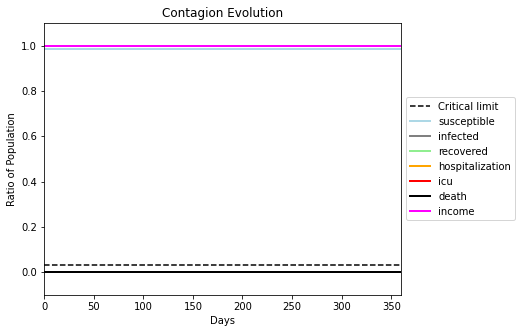

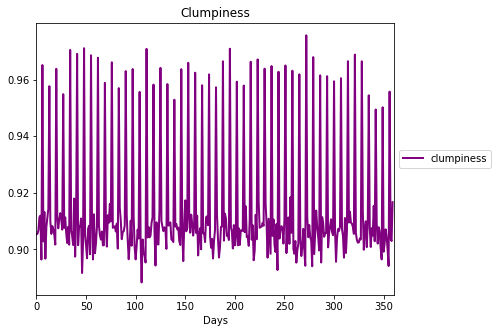

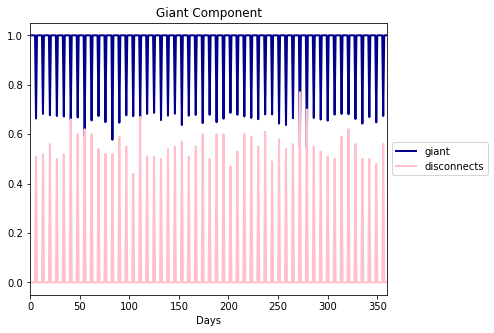

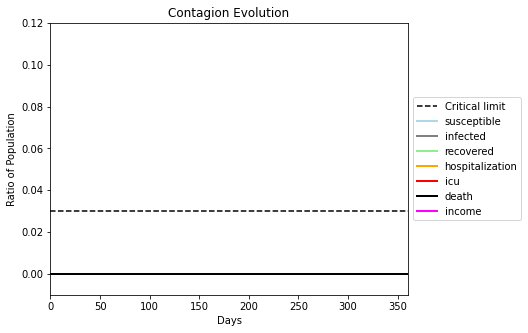

In [12]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.993
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= num_runs,fname = run_prefix+"T-.993", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank)


Save these seeds if you want to rerun a scenario
[6674]
Average similarity between family members is 0.9822720025961469 at temperature -0.992
Average similarity between family and home is 0.9998875912067003 at temperature -1
Average similarity between students and their classroom is 0.5330888372741562 at temperature -0.992
Average classroom occupancy is 11.833333333333334 and number classrooms is 24
Average similarity between workers is 0.8578336421601218 at temperature -0.992
Average office occupancy is 10.25 and number offices is 64
Average friend similarity for adults: 0.9494133335173144 for kids: 0.6601898998232434
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 2 people.
Total of 2 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 3 people.
Total of 3 peop

avg restaurant similarity 0.5496273831641223
clumpiness 0.8938425700116877
maxlen 17
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.26235405388821653
clumpiness 0.8984571278394808
maxlen 20
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6244202418789326
clumpiness 0.8849488526179703
maxlen 18
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.3693130424422619
clumpiness 0.906003479578557
maxlen 19
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.28782795298768304
clumpiness 0.9031570343571118
maxlen 19
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.4200735941441208
clumpiness 0.9060104627914226
maxlen 19
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.40563136297791924
clumpiness 0.9574334493336041
maxlen 21
giant component 0.7143890093998554
disconnects 0.55
avg restaurant similarity 0.4320287914326369
clumpiness 0.9015326171076946
maxlen 19
giant component 1.0
disconnects 0.0
avg restaurant

clumpiness 0.9011561216561217
maxlen 22
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.43403364939811095
clumpiness 0.8899888265329443
maxlen 17
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.4662825581641067
clumpiness 0.9070666459873117
maxlen 20
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.43885809005973686
clumpiness 0.9478315880152121
maxlen 29
giant component 0.6912509038322487
disconnects 0.42
avg restaurant similarity 0.6195224010037745
clumpiness 0.9039819553511504
maxlen 19
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.4008597132343387
clumpiness 0.8991444646255018
maxlen 21
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.4798470708679117
clumpiness 0.8965424349042771
maxlen 19
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.31832068374334466
clumpiness 0.9008320845820846
maxlen 16
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.48644332889143727
clumpiness 0

avg restaurant similarity 0.4180033449317035
clumpiness 0.8996368611178983
maxlen 20
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5167473867349094
clumpiness 0.8986221207413159
maxlen 19
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.37456725162646926
clumpiness 0.8862904138345316
maxlen 21
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.3067250537277855
clumpiness 0.9003772822464773
maxlen 19
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.3850206988453022
clumpiness 0.9000901435166142
maxlen 18
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.49870174485065266
clumpiness 0.9000248974881329
maxlen 17
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.45871280009848875
clumpiness 0.9573609491942376
maxlen 23
giant component 0.6410998552821997
disconnects 0.55
avg restaurant similarity 0.4512424517554851
clumpiness 0.9016135792741831
maxlen 19
giant component 1.0
disconnects 0.0
avg restauran

avg restaurant similarity 0.3664532738148354
clumpiness 0.895779473192786
maxlen 19
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.37226493980414854
clumpiness 0.8937870195679793
maxlen 19
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.4021877689729881
clumpiness 0.9737157239771604
maxlen 29
giant component 0.4027476500361533
disconnects 0.68
avg restaurant similarity 0.47540435244619483
clumpiness 0.9053484171057701
maxlen 17
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.4321248151637799
clumpiness 0.8953394034585985
maxlen 20
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.3835760921903776
clumpiness 0.8976534772417125
maxlen 20
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.4498565728375241
clumpiness 0.902015148894793
maxlen 19
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.4590097810138674
clumpiness 0.8978999360632488
maxlen 19
giant component 1.0
disconnects 0.0
avg restaurant s

clumpiness 0.8983810176751355
maxlen 18
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.4171199018139022
clumpiness 0.9015316505390035
maxlen 20
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5359147206986581
clumpiness 0.8956837166101872
maxlen 17
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.3785198511037113
clumpiness 0.8930779761604066
maxlen 19
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.4079245803171497
clumpiness 0.8930879733012087
maxlen 18
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.2795221773823984
clumpiness 0.8974996825070355
maxlen 20
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.41893109740504303
clumpiness 0.9595853127463269
maxlen 31
giant component 0.6890817064352857
disconnects 0.5
avg restaurant similarity 0.39805229221369615
clumpiness 0.899471577270339
maxlen 19
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.47578583902228755
clumpiness 0.89

avg restaurant similarity 0.41363441314977345
clumpiness 0.8961512803501968
maxlen 19
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.48643608565419594
clumpiness 0.8974382727265855
maxlen 19
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5108614082600452
clumpiness 0.961125717849402
maxlen 21
giant component 0.5878524945770065
disconnects 0.65
avg restaurant similarity 0.32870668782436857
clumpiness 0.902285591042944
maxlen 17
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.3129920012909334
clumpiness 0.8869417212904056
maxlen 19
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.3609049343353544
clumpiness 0.8986414157737688
maxlen 17
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.4272944206244652
clumpiness 0.9003665811312871
maxlen 17
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.29828394484619225
clumpiness 0.9022833941084716
maxlen 19
giant component 1.0
disconnects 0.0
avg restaurant

(<function dict.items>, <function dict.items>, <function dict.items>)

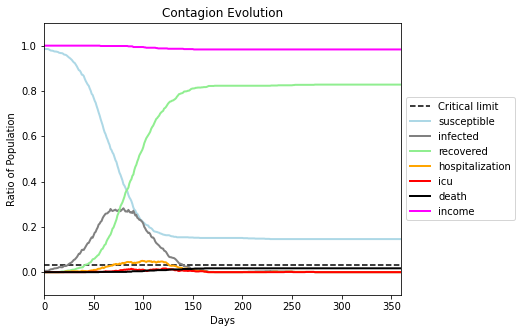

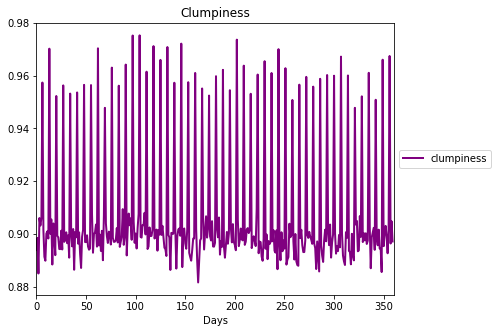

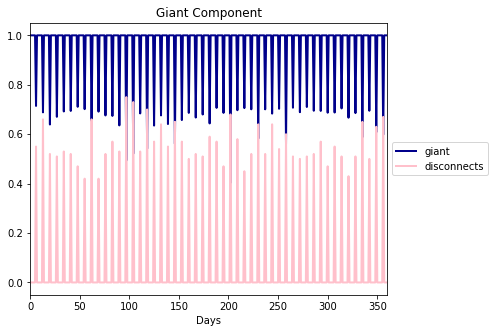

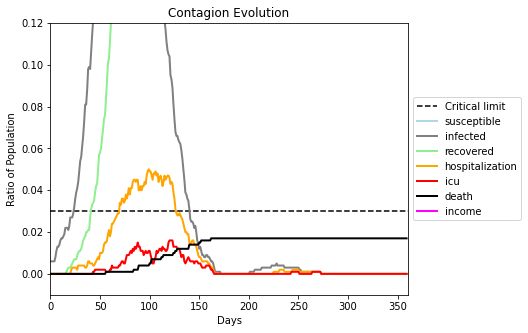

In [13]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.992
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= num_runs,fname = run_prefix+"T-.992", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank= compute_hoprank )


Save these seeds if you want to rerun a scenario
[1187]
Average similarity between family members is 0.9816057589322505 at temperature -0.991
Average similarity between family and home is 0.9998993224993766 at temperature -1
Average similarity between students and their classroom is 0.5132306324999372 at temperature -0.991
Average classroom occupancy is 12.26086956521739 and number classrooms is 23
Average similarity between workers is 0.9067060080455394 at temperature -0.991
Average office occupancy is 10.121212121212121 and number offices is 66
Average friend similarity for adults: 0.9608346315430385 for kids: 0.6649201837038438
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 3 people.
Tot

run with seed 1187:
avg restaurant similarity 0.4416813868057507
clumpiness 0.9042335787277739
maxlen 19
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.4774384203199436
clumpiness 0.9009750698647758
maxlen 22
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.47660208441029756
clumpiness 0.904096178546256
maxlen 19
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.3274362152240174
clumpiness 0.8993405093788222
maxlen 19
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.41600988381163695
clumpiness 0.9072619172193477
maxlen 20
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6846245131151698
clumpiness 0.8927155607979912
maxlen 19
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.33421760321647254
clumpiness 0.9841290653790654
maxlen 15
giant component 0.4033189033189033
disconnects 0.85
avg restaurant similarity 0.2816929372468401
clumpiness 0.9013387658093541
maxlen 20
giant component 1.0
disconnect

clumpiness 0.9036484169425346
maxlen 18
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.4755120611033153
clumpiness 0.8970904538787666
maxlen 21
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.4575407781414273
clumpiness 0.9085488931003638
maxlen 20
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5675198131129674
clumpiness 0.9733331858200279
maxlen 26
giant component 0.36967509025270756
disconnects 0.78
avg restaurant similarity 0.4290852311494034
clumpiness 0.8977969448851802
maxlen 18
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5345945043908635
clumpiness 0.9037477034918986
maxlen 20
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.3359246808848924
clumpiness 0.8999382064014417
maxlen 18
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.4693520100538025
clumpiness 0.904454899074094
maxlen 19
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.47743830543799604
clumpiness 0.90

avg restaurant similarity 0.5098876385304792
clumpiness 0.9018939549013079
maxlen 17
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.38434186278829147
clumpiness 0.9051756372712256
maxlen 20
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.31898197080643437
clumpiness 0.8991196140460846
maxlen 18
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.42522804354681515
clumpiness 0.8999017526591057
maxlen 18
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.4411831259319956
clumpiness 0.9061897661162368
maxlen 22
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.63078368648833
clumpiness 0.9017281470679305
maxlen 19
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.4767732075097256
clumpiness 0.9713734609044207
maxlen 22
giant component 0.5375180375180375
disconnects 0.73
avg restaurant similarity 0.6520860582568281
clumpiness 0.8931348025039976
maxlen 19
giant component 1.0
disconnects 0.0
avg restaurant 

avg restaurant similarity 0.47437295408640995
clumpiness 0.8938092103974458
maxlen 20
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5469650376401238
clumpiness 0.9078435977936753
maxlen 19
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.39033431154659
clumpiness 0.9847431647300069
maxlen 19
giant component 0.3795093795093795
disconnects 0.83
avg restaurant similarity 0.3170415201577581
clumpiness 0.8934771684713636
maxlen 20
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.41412360946326904
clumpiness 0.8990420427525692
maxlen 19
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5196241855250338
clumpiness 0.9047409324851277
maxlen 19
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.43225521133297823
clumpiness 0.9016629400011754
maxlen 18
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5276069094074124
clumpiness 0.8986644442159148
maxlen 18
giant component 1.0
disconnects 0.0
avg restaurant 

clumpiness 0.9041849890305773
maxlen 18
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.36957877311261667
clumpiness 0.9037143665158371
maxlen 20
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5077111466500803
clumpiness 0.9054049381990559
maxlen 22
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.1979226077804337
clumpiness 0.9082368126369674
maxlen 19
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.37410877707135787
clumpiness 0.9059896153897702
maxlen 19
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.6244531345154563
clumpiness 0.9019214396714397
maxlen 20
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.3269860994892348
clumpiness 0.9751060886440344
maxlen 37
giant component 0.43722943722943725
disconnects 0.68
avg restaurant similarity 0.27801713728215477
clumpiness 0.9033444782341842
maxlen 18
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.5611998528642732
clumpiness 0

avg restaurant similarity 0.639995356722004
clumpiness 0.9110552921450755
maxlen 20
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.19070710862288115
clumpiness 0.9080628987026047
maxlen 21
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.3674411238215067
clumpiness 0.9661210254692805
maxlen 39
giant component 0.6688311688311688
disconnects 0.5
avg restaurant similarity 0.28945169812445104
clumpiness 0.8994488177371305
maxlen 22
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.1880028661449825
clumpiness 0.9066594949168479
maxlen 21
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.35093280163171997
clumpiness 0.8996535486787035
maxlen 19
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.47578766934098343
clumpiness 0.9072015152030632
maxlen 19
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.41395704033484443
clumpiness 0.904169647346118
maxlen 20
giant component 1.0
disconnects 0.0
avg restaurant

(<function dict.items>, <function dict.items>, <function dict.items>)

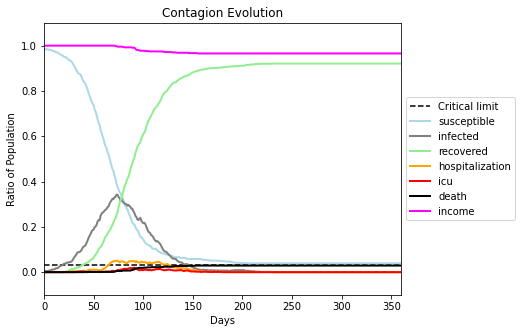

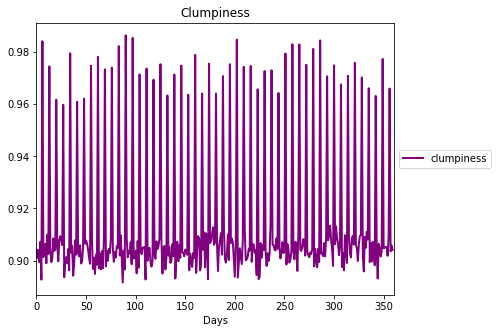

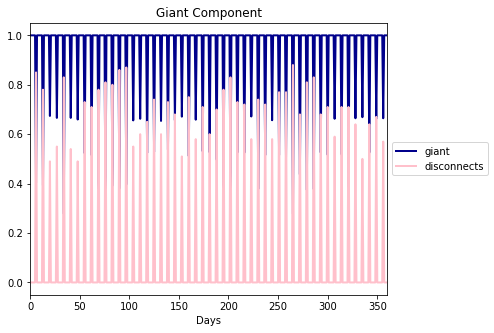

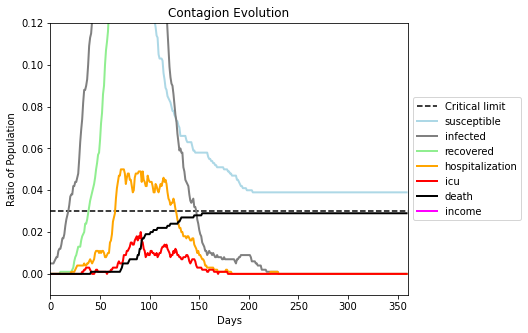

In [14]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.991
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= num_runs,fname = run_prefix+"T-.991", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )


Save these seeds if you want to rerun a scenario
[5198]
Average similarity between family members is 0.977946351333771 at temperature -0.99
Average similarity between family and home is 0.9998966512508576 at temperature -1
Average similarity between students and their classroom is 0.3837578893517496 at temperature -0.99
Average classroom occupancy is 11.583333333333334 and number classrooms is 24
Average similarity between workers is 0.8802409290314278 at temperature -0.99
Average office occupancy is 10 and number offices is 66
Average friend similarity for adults: 0.930979190539954 for kids: 0.6325021267112214
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 2 allocated units with a total of 6 people.
Total of 6 people alloc

run with seed 5198:
avg restaurant similarity 0.39122929821744973
clumpiness 0.8995580351021528
maxlen 18
giant component 0.9965445749827229
disconnects 0.0
avg restaurant similarity 0.403062281971017
clumpiness 0.897131725300843
maxlen 17
giant component 0.9965445749827229
disconnects 0.02
avg restaurant similarity 0.32496741644695115
clumpiness 0.8941194916194917
maxlen 16
giant component 0.9965445749827229
disconnects 0.02
avg restaurant similarity 0.40005357436417294
clumpiness 0.8941360445110446
maxlen 18
giant component 0.9965445749827229
disconnects 0.01
avg restaurant similarity 0.17472921895566979
clumpiness 0.8936298840048841
maxlen 18
giant component 0.9965445749827229
disconnects 0.01
avg restaurant similarity 0.23659959972573633
clumpiness 0.8931165835798189
maxlen 18
giant component 0.9965445749827229
disconnects 0.0
avg restaurant similarity 0.4813937242571842
clumpiness 0.9615860497861272
maxlen 19
giant component 0.663287472845764
disconnects 0.59
avg restaurant simila

avg restaurant similarity 0.2551287894638349
clumpiness 0.8960968116850471
maxlen 18
giant component 0.9965445749827229
disconnects 0.0
avg restaurant similarity 0.13057295582058848
clumpiness 0.9015340786664316
maxlen 17
giant component 0.9965421853388658
disconnects 0.0
avg restaurant similarity 0.39611015454290743
clumpiness 0.9537811150986881
maxlen 23
giant component 0.664011585807386
disconnects 0.5
avg restaurant similarity 0.2072045145525023
clumpiness 0.8959221472971474
maxlen 16
giant component 0.9965445749827229
disconnects 0.0
avg restaurant similarity 0.1683107158571469
clumpiness 0.8944460272269871
maxlen 19
giant component 0.9965445749827229
disconnects 0.0
avg restaurant similarity 0.29796042115283045
clumpiness 0.8935184496875673
maxlen 17
giant component 0.9965421853388658
disconnects 0.0
avg restaurant similarity 0.31789327202533335
clumpiness 0.8992590763209959
maxlen 19
giant component 0.9965445749827229
disconnects 0.0
avg restaurant similarity 0.2850271901034291


avg restaurant similarity 0.1152692487742379
clumpiness 0.9014719920602274
maxlen 18
giant component 0.9965445749827229
disconnects 0.01
avg restaurant similarity 0.21145203992220993
clumpiness 0.8975074010956364
maxlen 17
giant component 0.9965445749827229
disconnects 0.0
avg restaurant similarity 0.2377161054931532
clumpiness 0.8907334250716604
maxlen 17
giant component 0.9965445749827229
disconnects 0.0
avg restaurant similarity 0.18876935763971747
clumpiness 0.890730580693816
maxlen 18
giant component 0.9965445749827229
disconnects 0.02
avg restaurant similarity 0.2622355116214501
clumpiness 0.8938841770974124
maxlen 18
giant component 0.9965445749827229
disconnects 0.0
avg restaurant similarity 0.2579720332474968
clumpiness 0.9666656541463851
maxlen 28
giant component 0.6422881969587255
disconnects 0.63
avg restaurant similarity 0.2648030248153228
clumpiness 0.9036920230612182
maxlen 19
giant component 0.9965445749827229
disconnects 0.01
avg restaurant similarity 0.141192430468335

avg restaurant similarity 0.37714167347245814
clumpiness 0.8974924062865239
maxlen 17
giant component 0.9965445749827229
disconnects 0.0
avg restaurant similarity 0.1251711198031311
clumpiness 0.9763648832397318
maxlen 23
giant component 0.4011585807385952
disconnects 0.75
avg restaurant similarity 0.3645101245153873
clumpiness 0.8964415364047718
maxlen 18
giant component 0.9965445749827229
disconnects 0.0
avg restaurant similarity 0.2243045747895739
clumpiness 0.8936627427010555
maxlen 20
giant component 0.9965445749827229
disconnects 0.01
avg restaurant similarity 0.2371568013851548
clumpiness 0.8892005217005218
maxlen 16
giant component 0.9965445749827229
disconnects 0.0
avg restaurant similarity 0.3001261188040389
clumpiness 0.8923711062329484
maxlen 19
giant component 0.9965445749827229
disconnects 0.0
avg restaurant similarity 0.15556737279361268
clumpiness 0.8927742135315665
maxlen 17
giant component 0.9965445749827229
disconnects 0.0
avg restaurant similarity 0.2552374695812459

avg restaurant similarity 0.21497068910061617
clumpiness 0.9012670066861244
maxlen 17
giant component 0.9965445749827229
disconnects 0.03
avg restaurant similarity 0.29265125547500853
clumpiness 0.8982168028050382
maxlen 18
giant component 0.9965445749827229
disconnects 0.0
avg restaurant similarity 0.2584325326722892
clumpiness 0.8883561963062737
maxlen 19
giant component 0.9965445749827229
disconnects 0.0
avg restaurant similarity 0.28557373167400435
clumpiness 0.8921613802863803
maxlen 18
giant component 0.9965445749827229
disconnects 0.01
avg restaurant similarity 0.28534272192149956
clumpiness 0.9542087300384514
maxlen 22
giant component 0.663287472845764
disconnects 0.54
avg restaurant similarity 0.2524532855690498
clumpiness 0.8896194222444223
maxlen 16
giant component 0.9965445749827229
disconnects 0.01
avg restaurant similarity 0.2269093214939051
clumpiness 0.9039615857998211
maxlen 17
giant component 0.9965445749827229
disconnects 0.0
avg restaurant similarity 0.2968852567709

avg restaurant similarity 0.2273007077869874
clumpiness 0.9565479561717952
maxlen 22
giant component 0.6813902968863143
disconnects 0.5
avg restaurant similarity 0.18170965326757824
clumpiness 0.8955520570330943
maxlen 21
giant component 0.9965445749827229
disconnects 0.02
avg restaurant similarity 0.10326153452441285
clumpiness 0.9006055170319877
maxlen 17
giant component 0.9965445749827229
disconnects 0.0
avg restaurant similarity 0.250115729048356
clumpiness 0.897332219251337
maxlen 18
giant component 0.9965445749827229
disconnects 0.0
avg restaurant similarity 0.25834024141634465
clumpiness 0.8952175514543936
maxlen 19
giant component 0.9965445749827229
disconnects 0.01
avg restaurant similarity 0.22675467760543688
clumpiness 0.9009390311700683
maxlen 20
giant component 0.9965445749827229
disconnects 0.0
avg restaurant similarity 0.18469900966039535
clumpiness 0.8970502650943828
maxlen 18
giant component 0.9965445749827229
disconnects 0.0
avg restaurant similarity 0.305736528965006

using average of time series:
stats on susceptible:
data: [0.27753611111111104]
min:
0.27753611111111104
max:
0.27753611111111104
std:
0.0
mean:
0.27753611111111104
median:
0.27753611111111104
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on infected:
data: [0.05563888888888889]
min:
0.05563888888888889
max:
0.05563888888888889
std:
0.0
mean:
0.05563888888888889
median:
0.05563888888888889
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on recovered:
data: [0.6358444444444445]
min:
0.6358444444444445
max:
0.6358444444444445
std:
0.0
mean:
0.6358444444444445
median:
0.6358444444444445
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on hospitalization:
data: [0.00942777777777778]
min:
0.00942777777777778
max:
0.00942777777777778
std:
0.0
mean:
0.00942777777777778
median:
0.00942777777777778
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on icu

(<function dict.items>, <function dict.items>, <function dict.items>)

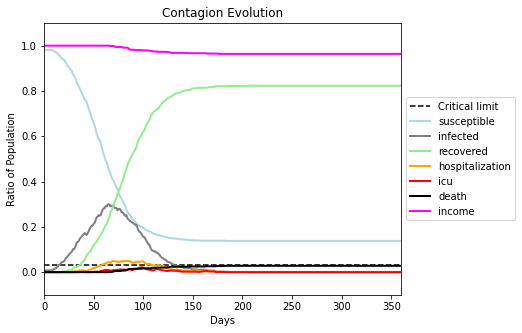

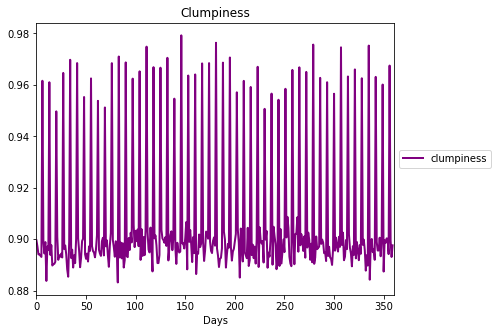

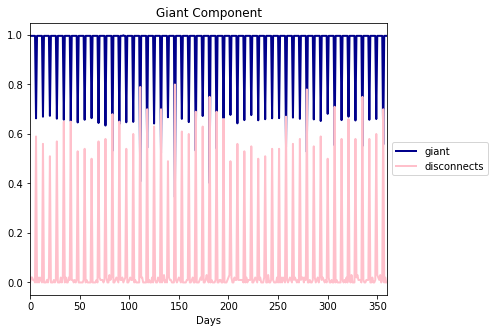

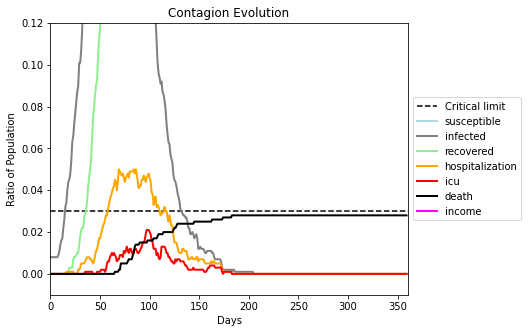

In [15]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.99
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= num_runs,fname = run_prefix+"T-.99", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )


Save these seeds if you want to rerun a scenario
[5662]
Average similarity between family members is 0.962758386653372 at temperature -0.98
Average similarity between family and home is 0.9999009081912741 at temperature -1
Average similarity between students and their classroom is 0.37934735924589486 at temperature -0.98
Average classroom occupancy is 12.083333333333334 and number classrooms is 24
Average similarity between workers is 0.7578631678339802 at temperature -0.98
Average office occupancy is 9.893939393939394 and number offices is 66
Average friend similarity for adults: 0.8691538163573038 for kids: 0.6237386288405927
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total 

avg restaurant similarity 0.32595056811534756
clumpiness 0.8893958135517734
maxlen 19
giant component 0.9986072423398329
disconnects 0.0
avg restaurant similarity 0.36495947580467103
clumpiness 0.8954025794466971
maxlen 17
giant component 0.9986072423398329
disconnects 0.0
avg restaurant similarity 0.10594215090988032
clumpiness 0.8915756327006328
maxlen 16
giant component 0.9986072423398329
disconnects 0.0
avg restaurant similarity 0.499415254899347
clumpiness 0.8953017121767122
maxlen 16
giant component 0.9986072423398329
disconnects 0.02
avg restaurant similarity 0.08341757950223987
clumpiness 0.8866909895659897
maxlen 20
giant component 0.9986072423398329
disconnects 0.0
avg restaurant similarity 0.12183119695420289
clumpiness 0.8892719502719504
maxlen 15
giant component 0.9986072423398329
disconnects 0.0
avg restaurant similarity 0.44198296612345167
clumpiness 0.9607607479249187
maxlen 26
giant component 0.6620437956204379
disconnects 0.56
avg restaurant similarity -0.147029781014

avg restaurant similarity 0.04215200861024576
clumpiness 0.890035710204828
maxlen 17
giant component 0.9986072423398329
disconnects 0.0
avg restaurant similarity 0.05947618471868046
clumpiness 0.8979058164058165
maxlen 16
giant component 0.9986072423398329
disconnects 0.01
avg restaurant similarity 0.0267009207488527
clumpiness 0.9654306369304855
maxlen 23
giant component 0.6598540145985401
disconnects 0.53
avg restaurant similarity 0.04308244563871527
clumpiness 0.8950710041592395
maxlen 17
giant component 0.9986072423398329
disconnects 0.0
avg restaurant similarity -0.03521202234452079
clumpiness 0.8938046398046399
maxlen 15
giant component 0.9986072423398329
disconnects 0.0
avg restaurant similarity 0.05382875163961639
clumpiness 0.8944011127761129
maxlen 21
giant component 0.9986072423398329
disconnects 0.0
avg restaurant similarity 0.004896716009242274
clumpiness 0.9011381863750285
maxlen 19
giant component 0.9986072423398329
disconnects 0.01
avg restaurant similarity -0.134976689

clumpiness 0.8907746518187696
maxlen 17
giant component 0.9937325905292479
disconnects 0.01
avg restaurant similarity 0.2754012608263155
clumpiness 0.8882216908908086
maxlen 17
giant component 0.9937325905292479
disconnects 0.03
avg restaurant similarity 0.1305223420583549
clumpiness 0.8972744991936169
maxlen 17
giant component 0.9937325905292479
disconnects 0.02
avg restaurant similarity -0.05738279415977496
clumpiness 0.8960334069525246
maxlen 17
giant component 0.9937325905292479
disconnects 0.04
avg restaurant similarity -0.12345195719242315
clumpiness 0.8944075605766783
maxlen 17
giant component 0.9937325905292479
disconnects 0.0
avg restaurant similarity -0.030489957327803647
clumpiness 0.9850637754208221
maxlen 26
giant component 0.43795620437956206
disconnects 0.82
avg restaurant similarity -0.12738461754662364
clumpiness 0.896595206264324
maxlen 17
giant component 0.9937325905292479
disconnects 0.0
avg restaurant similarity -0.06844203299299488
clumpiness 0.9013575174825175
ma

avg restaurant similarity 0.30406244925465803
clumpiness 0.890969984264102
maxlen 17
giant component 0.9937325905292479
disconnects 0.01
avg restaurant similarity 0.11647634640988559
clumpiness 0.9643335697109758
maxlen 23
giant component 0.6532846715328468
disconnects 0.54
avg restaurant similarity 0.27524031368487073
clumpiness 0.9009619604251957
maxlen 17
giant component 0.9937325905292479
disconnects 0.06
avg restaurant similarity 0.06972426346071726
clumpiness 0.8956317026626625
maxlen 19
giant component 0.9937325905292479
disconnects 0.0
avg restaurant similarity 0.49970050610942307
clumpiness 0.893920640633876
maxlen 18
giant component 0.9937325905292479
disconnects 0.01
avg restaurant similarity -0.015294314007438248
clumpiness 0.8912657122289477
maxlen 17
giant component 0.9937325905292479
disconnects 0.01
avg restaurant similarity -0.08194678838506307
clumpiness 0.8957459762459763
maxlen 20
giant component 0.9937325905292479
disconnects 0.0
avg restaurant similarity 0.0510381

avg restaurant similarity 0.0865748374265393
clumpiness 0.9020507605139959
maxlen 18
giant component 0.9937325905292479
disconnects 0.01
avg restaurant similarity 0.3797677844966562
clumpiness 0.9011014818514819
maxlen 16
giant component 0.9937325905292479
disconnects 0.05
avg restaurant similarity -0.011514363010313734
clumpiness 0.8964681666372843
maxlen 17
giant component 0.9937325905292479
disconnects 0.0
avg restaurant similarity 0.4772017167293542
clumpiness 0.8943849304290481
maxlen 17
giant component 0.9937325905292479
disconnects 0.01
avg restaurant similarity -0.19014759305899698
clumpiness 0.9654472986291165
maxlen 25
giant component 0.5284671532846715
disconnects 0.64
avg restaurant similarity 0.19655802771023118
clumpiness 0.8967207351472057
maxlen 17
giant component 0.9937325905292479
disconnects 0.01
avg restaurant similarity 0.07696035757749377
clumpiness 0.8921663197913199
maxlen 16
giant component 0.9937325905292479
disconnects 0.01
avg restaurant similarity 0.0297737

avg restaurant similarity 0.19091256645161317
clumpiness 0.9516748050580162
maxlen 23
giant component 0.6496350364963503
disconnects 0.46
avg restaurant similarity 0.3879494759087751
clumpiness 0.8869955975397152
maxlen 21
giant component 0.9937325905292479
disconnects 0.01
avg restaurant similarity 0.27837002686342394
clumpiness 0.8919542263292264
maxlen 16
giant component 0.9937325905292479
disconnects 0.0
avg restaurant similarity -9.585641156204281e-05
clumpiness 0.8959999594059193
maxlen 19
giant component 0.9937325905292479
disconnects 0.0
avg restaurant similarity 0.3523743896036887
clumpiness 0.8948711247902424
maxlen 17
giant component 0.9937325905292479
disconnects 0.03
avg restaurant similarity 0.2902026383711771
clumpiness 0.8971395091836268
maxlen 17
giant component 0.9937325905292479
disconnects 0.02
avg restaurant similarity 0.3363394915362548
clumpiness 0.8941074440265617
maxlen 20
giant component 0.9937325905292479
disconnects 0.0
avg restaurant similarity 0.1939118049

using average of time series:
stats on susceptible:
data: [0.22163888888888886]
min:
0.22163888888888886
max:
0.22163888888888886
std:
0.0
mean:
0.22163888888888886
median:
0.22163888888888886
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on infected:
data: [0.057633333333333335]
min:
0.057633333333333335
max:
0.057633333333333335
std:
0.0
mean:
0.057633333333333335
median:
0.057633333333333335
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on recovered:
data: [0.6857166666666666]
min:
0.6857166666666666
max:
0.6857166666666666
std:
0.0
mean:
0.6857166666666666
median:
0.6857166666666666
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on hospitalization:
data: [0.008463888888888889]
min:
0.008463888888888889
max:
0.008463888888888889
std:
0.0
mean:
0.008463888888888889
median:
0.008463888888888889
95% confidence interval for the mean:
(nan,nan)
using average of time series:
st

(<function dict.items>, <function dict.items>, <function dict.items>)

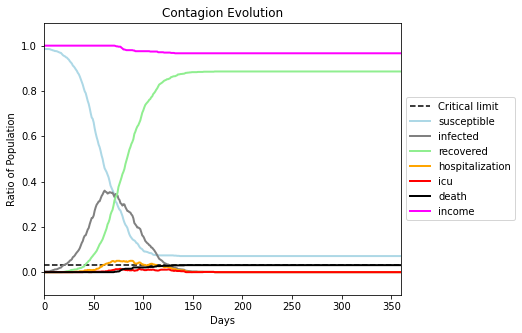

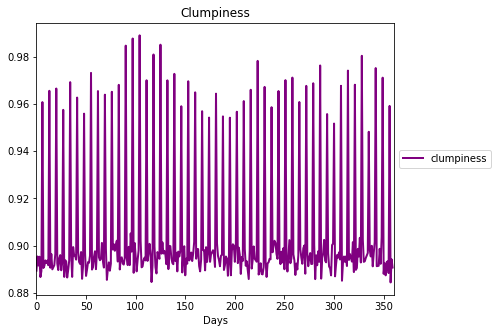

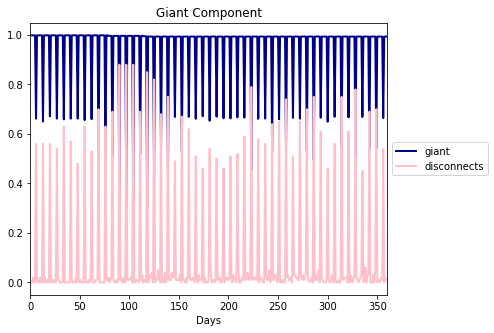

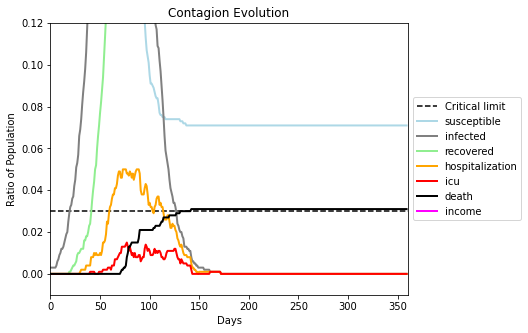

In [16]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.98
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= num_runs,fname = run_prefix+"T-.989", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )


Save these seeds if you want to rerun a scenario
[1851]
Average similarity between family members is 0.9315565100024237 at temperature -0.97
Average similarity between family and home is 0.999904642916579 at temperature -1
Average similarity between students and their classroom is 0.32288383290749784 at temperature -0.97
Average classroom occupancy is 12.375 and number classrooms is 24
Average similarity between workers is 0.655500029909719 at temperature -0.97
Average office occupancy is 9.757575757575758 and number offices is 66
Average friend similarity for adults: 0.8100454199542632 for kids: 0.5942536141736686
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 2 people.
Total of 2 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 3 people.
Total of 3 people a

run with seed 1851:
avg restaurant similarity 0.11820678169053081
clumpiness 0.8850437062937063
maxlen 14
giant component 0.9965253648366922
disconnects 0.0
avg restaurant similarity 0.21825042573965361
clumpiness 0.8875343684093685
maxlen 16
giant component 0.9965253648366922
disconnects 0.01
avg restaurant similarity 0.29134966964947207
clumpiness 0.8812470168720169
maxlen 16
giant component 0.9965253648366922
disconnects 0.0
avg restaurant similarity 0.19201886004111715
clumpiness 0.8832002539943717
maxlen 17
giant component 0.9965253648366922
disconnects 0.0
avg restaurant similarity 0.21882547915467854
clumpiness 0.8903943654384832
maxlen 17
giant component 0.9965253648366922
disconnects 0.0
avg restaurant similarity 0.19042078249711838
clumpiness 0.8900227550227551
maxlen 14
giant component 0.9965253648366922
disconnects 0.03
avg restaurant similarity 0.18458470790880974
clumpiness 0.9429154883214481
maxlen 19
giant component 0.7035688273852877
disconnects 0.47
avg restaurant sim

avg restaurant similarity 0.22185740315672686
clumpiness 0.8858755647946825
maxlen 17
giant component 0.9965253648366922
disconnects 0.01
avg restaurant similarity 0.24354158771827844
clumpiness 0.8756423813114991
maxlen 17
giant component 0.9965253648366922
disconnects 0.01
avg restaurant similarity 0.22955094333237525
clumpiness 0.9592917248300376
maxlen 20
giant component 0.7203204661325564
disconnects 0.54
avg restaurant similarity 0.30186571401997897
clumpiness 0.8834468586968588
maxlen 13
giant component 0.9965253648366922
disconnects 0.02
avg restaurant similarity 0.15083855932344073
clumpiness 0.885977577977578
maxlen 15
giant component 0.9965253648366922
disconnects 0.0
avg restaurant similarity 0.21023344063945487
clumpiness 0.887055389055389
maxlen 14
giant component 0.9965253648366922
disconnects 0.01
avg restaurant similarity 0.23889002211229424
clumpiness 0.8862696747696748
maxlen 14
giant component 0.9965253648366922
disconnects 0.0
avg restaurant similarity 0.3865477444

avg restaurant similarity 0.19682835889770584
clumpiness 0.8828404650904651
maxlen 14
giant component 0.9937456567060459
disconnects 0.0
avg restaurant similarity 0.092864838634817
clumpiness 0.8870958028899206
maxlen 17
giant component 0.9909659485753995
disconnects 0.02
avg restaurant similarity 0.15357222803673104
clumpiness 0.891389332889333
maxlen 14
giant component 0.9909659485753995
disconnects 0.01
avg restaurant similarity 0.15520017665295327
clumpiness 0.8910910298851475
maxlen 18
giant component 0.9909659485753995
disconnects 0.01
avg restaurant similarity 0.19781012074688664
clumpiness 0.8923960206460207
maxlen 15
giant component 0.9909659485753995
disconnects 0.02
avg restaurant similarity 0.230489473125451
clumpiness 0.947688211513289
maxlen 19
giant component 0.7042971595047341
disconnects 0.52
avg restaurant similarity 0.1447166427817245
clumpiness 0.8860384811267165
maxlen 17
giant component 0.9909659485753995
disconnects 0.01
avg restaurant similarity 0.16552140042914

avg restaurant similarity 0.318994301805937
clumpiness 0.8855782273282274
maxlen 15
giant component 0.9909659485753995
disconnects 0.01
avg restaurant similarity 0.12254951726469941
clumpiness 0.9619389177214255
maxlen 19
giant component 0.7130371449380918
disconnects 0.55
avg restaurant similarity 0.27910074883245595
clumpiness 0.8852848540348541
maxlen 15
giant component 0.9909659485753995
disconnects 0.0
avg restaurant similarity 0.08966128725851921
clumpiness 0.8886701076701078
maxlen 18
giant component 0.9909659485753995
disconnects 0.01
avg restaurant similarity 0.18303412115773957
clumpiness 0.8873319874569876
maxlen 16
giant component 0.9909659485753995
disconnects 0.0
avg restaurant similarity 0.11725051342863832
clumpiness 0.8884356574797752
maxlen 17
giant component 0.9909659485753995
disconnects 0.02
avg restaurant similarity 0.12232239273130031
clumpiness 0.8893709484959486
maxlen 16
giant component 0.9909659485753995
disconnects 0.01
avg restaurant similarity 0.0664040044

avg restaurant similarity 0.17828485161750246
clumpiness 0.8828091491841492
maxlen 16
giant component 0.9909659485753995
disconnects 0.01
avg restaurant similarity 0.04172008001925448
clumpiness 0.8956064768564769
maxlen 15
giant component 0.9909659485753995
disconnects 0.03
avg restaurant similarity 0.2868363911360113
clumpiness 0.883880785880786
maxlen 14
giant component 0.9909659485753995
disconnects 0.03
avg restaurant similarity 0.14233928236749624
clumpiness 0.8862996170496171
maxlen 14
giant component 0.9909659485753995
disconnects 0.02
avg restaurant similarity 0.2088033674112944
clumpiness 0.9541748602704485
maxlen 18
giant component 0.7319737800437
disconnects 0.51
avg restaurant similarity 0.2693085160198192
clumpiness 0.8927461982461983
maxlen 14
giant component 0.9909659485753995
disconnects 0.03
avg restaurant similarity 0.28212446567780153
clumpiness 0.8905402375402376
maxlen 15
giant component 0.9909659485753995
disconnects 0.04
avg restaurant similarity 0.0899036718511

avg restaurant similarity 0.14253305959963575
clumpiness 0.9485854758416679
maxlen 21
giant component 0.7166788055353241
disconnects 0.45
avg restaurant similarity 0.14464613979887353
clumpiness 0.8948487207237208
maxlen 16
giant component 0.9909659485753995
disconnects 0.02
avg restaurant similarity 0.18642036618596675
clumpiness 0.8870168720168721
maxlen 15
giant component 0.9909659485753995
disconnects 0.05
avg restaurant similarity 0.20096475272228406
clumpiness 0.8894364940614942
maxlen 16
giant component 0.9909659485753995
disconnects 0.03
avg restaurant similarity 0.18757458472439764
clumpiness 0.8931199356199357
maxlen 14
giant component 0.9909659485753995
disconnects 0.03
avg restaurant similarity 0.20249781038552883
clumpiness 0.8844478993228995
maxlen 16
giant component 0.9909659485753995
disconnects 0.0
avg restaurant similarity 0.24726346744549238
clumpiness 0.8866565517815518
maxlen 16
giant component 0.9909659485753995
disconnects 0.01
avg restaurant similarity 0.2555316

using average of time series:
stats on susceptible:
data: [0.17239999999999997]
min:
0.17239999999999997
max:
0.17239999999999997
std:
0.0
mean:
0.17239999999999997
median:
0.17239999999999997
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on infected:
data: [0.059586111111111104]
min:
0.059586111111111104
max:
0.059586111111111104
std:
0.0
mean:
0.059586111111111104
median:
0.059586111111111104
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on recovered:
data: [0.7264861111111114]
min:
0.7264861111111114
max:
0.7264861111111114
std:
0.0
mean:
0.7264861111111114
median:
0.7264861111111114
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on hospitalization:
data: [0.009358333333333333]
min:
0.009358333333333333
max:
0.009358333333333333
std:
0.0
mean:
0.009358333333333333
median:
0.009358333333333333
95% confidence interval for the mean:
(nan,nan)
using average of time series:
st

(<function dict.items>, <function dict.items>, <function dict.items>)

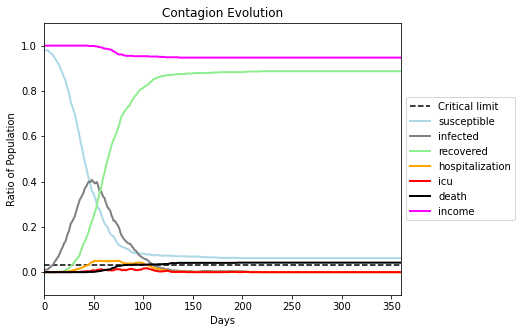

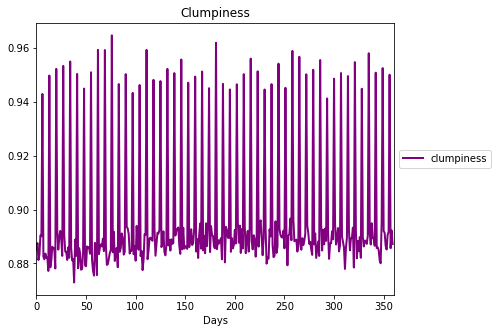

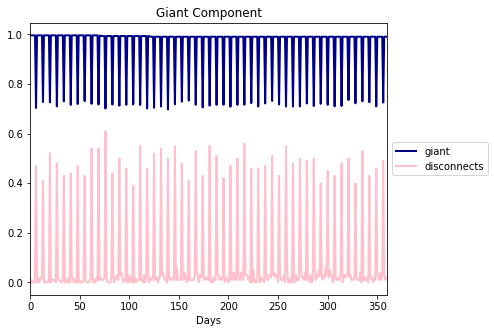

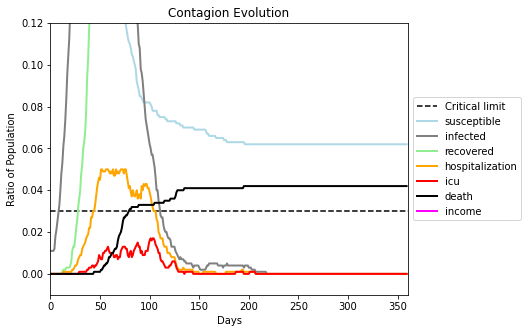

In [17]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.97
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= num_runs,fname = run_prefix+"T-.97", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )


Save these seeds if you want to rerun a scenario
[7003]
Average similarity between family members is 0.04558150404958133 at temperature 1
Average similarity between family and home is 0.9999069151533213 at temperature -1
Average similarity between students and their classroom is 0.0746178759495285 at temperature 1
Average classroom occupancy is 11.333333333333334 and number classrooms is 24
Average similarity between workers is 0.02462848812085366 at temperature 1
Average office occupancy is 10.181818181818182 and number offices is 66
Average friend similarity for adults: 0.08803284630144291 for kids: 0.09760787093158142
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 3 allocated units with a total of 6 people.
Total of 6 pe

run with seed 7003:
avg restaurant similarity 0.05169896349862033
clumpiness 0.8787239427239428
maxlen 13
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.042410558063757604
clumpiness 0.8884832944832946
maxlen 14
giant component 1.0
disconnects 0.0
avg restaurant similarity -0.03395076950054047
clumpiness 0.8823113553113554
maxlen 13
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.0850810085237472
clumpiness 0.8738705183705184
maxlen 13
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.044417914763881135
clumpiness 0.8796166611166611
maxlen 13
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.08518741054955531
clumpiness 0.884404428904429
maxlen 13
giant component 1.0
disconnects 0.0
avg restaurant similarity -0.0059162363897061285
clumpiness 0.9458228854478855
maxlen 18
giant component 0.7376697641172266
disconnects 0.49
avg restaurant similarity 0.004832447209704292
clumpiness 0.8826396381396382
maxlen 14
giant component 1.0

avg restaurant similarity 0.05645558857663306
clumpiness 0.8814701964701965
maxlen 14
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.008419713886315806
clumpiness 0.8815845543345544
maxlen 13
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.013044494381200353
clumpiness 0.879393106893107
maxlen 13
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.022774215827185997
clumpiness 0.9431621322004449
maxlen 21
giant component 0.7097927090779128
disconnects 0.46
avg restaurant similarity 0.062453301169774586
clumpiness 0.8769054834054835
maxlen 14
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.058546923286513466
clumpiness 0.8843320290820291
maxlen 14
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.07727550885631104
clumpiness 0.8857943722943724
maxlen 12
giant component 1.0
disconnects 0.0
avg restaurant similarity 0.04213866336897909
clumpiness 0.8826552614052615
maxlen 14
giant component 1.0
disconnects 0.0
avg 

avg restaurant similarity 0.05465742093314187
clumpiness 0.8785074925074926
maxlen 13
giant component 0.9972696245733789
disconnects 0.0
avg restaurant similarity 0.11896079011051587
clumpiness 0.8833246198246198
maxlen 14
giant component 0.9972696245733789
disconnects 0.0
avg restaurant similarity 0.05444760950079546
clumpiness 0.8804093406593407
maxlen 14
giant component 0.9972696245733789
disconnects 0.01
avg restaurant similarity 0.06356052761976845
clumpiness 0.8817559107559109
maxlen 14
giant component 0.9972696245733789
disconnects 0.0
avg restaurant similarity 0.046742920093656125
clumpiness 0.9549323829765006
maxlen 17
giant component 0.7312365975696926
disconnects 0.54
avg restaurant similarity 0.07810255198503242
clumpiness 0.8943028360528361
maxlen 14
giant component 0.9972696245733789
disconnects 0.02
avg restaurant similarity 0.04689842930175447
clumpiness 0.8784878732378734
maxlen 14
giant component 0.9972696245733789
disconnects 0.0
avg restaurant similarity -0.00273802

avg restaurant similarity -0.017251089372605527
clumpiness 0.9495164676225047
maxlen 19
giant component 0.7462473195139385
disconnects 0.41
avg restaurant similarity 0.04041227285345231
clumpiness 0.8868721001221002
maxlen 14
giant component 0.9972696245733789
disconnects 0.0
avg restaurant similarity 0.02785283157900396
clumpiness 0.876359806859807
maxlen 13
giant component 0.9972696245733789
disconnects 0.01
avg restaurant similarity 0.022428425984874118
clumpiness 0.8816042846042846
maxlen 14
giant component 0.9972696245733789
disconnects 0.0
avg restaurant similarity 0.06579466697823526
clumpiness 0.8687513597513599
maxlen 13
giant component 0.9972696245733789
disconnects 0.0
avg restaurant similarity 0.022780798401529453
clumpiness 0.8787081529581531
maxlen 14
giant component 0.9972696245733789
disconnects 0.01
avg restaurant similarity -0.06435971931861763
clumpiness 0.8805512265512266
maxlen 12
giant component 0.9972696245733789
disconnects 0.0
avg restaurant similarity 0.036953

avg restaurant similarity 0.050625607337415855
clumpiness 0.8774902597402598
maxlen 14
giant component 0.9972696245733789
disconnects 0.01
avg restaurant similarity 0.024712999358168553
clumpiness 0.8844004606504607
maxlen 14
giant component 0.9972696245733789
disconnects 0.01
avg restaurant similarity 0.029792626685137727
clumpiness 0.8824677822177822
maxlen 13
giant component 0.9972696245733789
disconnects 0.03
avg restaurant similarity 0.08422002566254527
clumpiness 0.9554244972863394
maxlen 21
giant component 0.7219442458899213
disconnects 0.55
avg restaurant similarity 0.045691168784385526
clumpiness 0.8846615051615052
maxlen 15
giant component 0.9972696245733789
disconnects 0.01
avg restaurant similarity -0.015166406153314844
clumpiness 0.8853426295926297
maxlen 13
giant component 0.9972696245733789
disconnects 0.01
avg restaurant similarity 0.05013469931973524
clumpiness 0.8875923520923521
maxlen 14
giant component 0.9972696245733789
disconnects 0.02
avg restaurant similarity 0.

avg restaurant similarity 0.0973780215379556
clumpiness 0.8776172716172717
maxlen 13
giant component 0.9972696245733789
disconnects 0.01
avg restaurant similarity 0.05895233155163121
clumpiness 0.8733822843822845
maxlen 18
giant component 0.9972696245733789
disconnects 0.0
avg restaurant similarity 0.05379290000920333
clumpiness 0.8834481074481075
maxlen 13
giant component 0.9972696245733789
disconnects 0.0
avg restaurant similarity 0.03653217727318515
clumpiness 0.87901998001998
maxlen 13
giant component 0.9972696245733789
disconnects 0.0
avg restaurant similarity 0.062219029985166936
clumpiness 0.8797370407370408
maxlen 13
giant component 0.9972696245733789
disconnects 0.0
avg restaurant similarity 0.018925381730103916
clumpiness 0.8945016095016095
maxlen 14
giant component 0.9972696245733789
disconnects 0.02
avg restaurant similarity 0.05980850176887999
clumpiness 0.9438275768349298
maxlen 18
giant component 0.7326661901358112
disconnects 0.44
avg restaurant similarity 0.05771389504

(<function dict.items>, <function dict.items>, <function dict.items>)

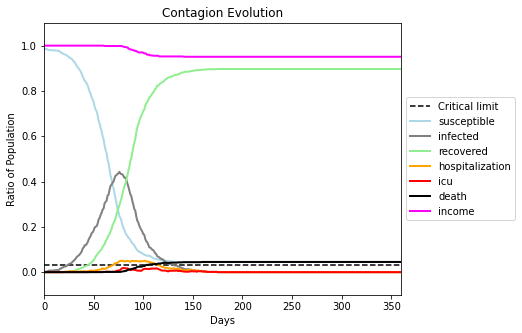

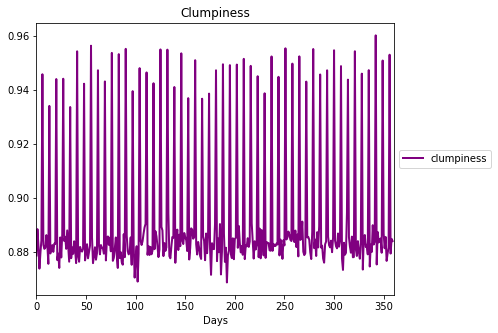

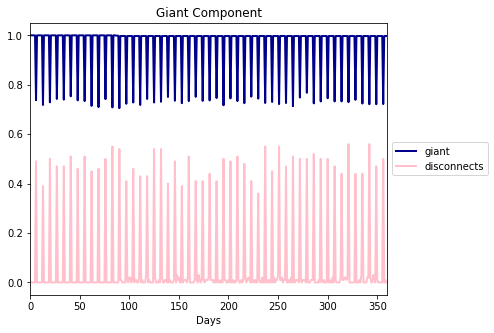

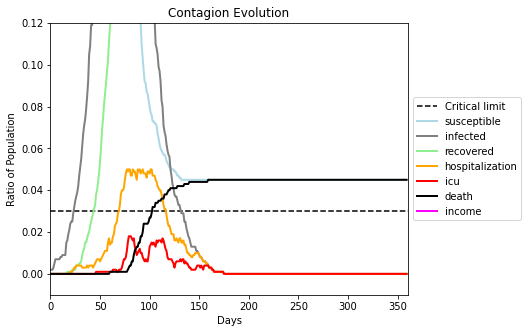

In [18]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = 1
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= num_runs,fname = run_prefix+"T1", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = compute_hoprank )
